In [9]:
## Ukiyo neko systems                                                                                                                       
## usando matplotlib para yegraficar datos bidimensionales                                                                                  
import matplotlib.pyplot as plt
import numpy as np

## aqui van los datos                                                                                                                       

#xes = [2,4,6,8]                                                                                                                            
#yes = [0.9,0.72,0.54,0.5] # 3V                                                                                                             
#yes = [0.24,0.18,0.16,0.13] # 6V                                                                                                           
#yes = [0.42,0.33,0.26,0.22] # 9V                                                                                                           
#yes = [0.57,0.44,0.35,0.30] # 12V                                                                                                          
#yes = [0.74,0.55,0.44,0.38] # 15V                                                                                                          


def graficaDatos(xes, yes,incertx,incerty,indiceImpulso, xlabel, ylabel, titulo):

## xes -> variable independiente
## yes -> variable dependiente
## incertx -> incertidumbre var indep
## incerty -> incertidumbre var dep
## indiceImpulso -> elemento de la serie de tiempo en que se imprime el impulso sobre la masa (recuerda que los indices empiezan en 0)


## usamos un poco de automagia para autodeterminar los limites de                                                                           
## la grafica                                                                                                                               
# eje x                                                                                                                                     
    xprincipio=min(xes)
    xfin=max(xes)
    xintervalo = xfin-xprincipio
    xescalar = xintervalo/20 # el numero por que multiplicamos intervalo cambia que tanto                                                   
    #espacio blanco dejamos a las esquinas                                                                                                  
    # eje y                                                                                                                                 
    yprincipio=min(yes)
    yfin= max(yes)
    yintervalo=yfin-yprincipio
    yescalar = yintervalo/20
    
    ## ajustamos los limites de la grafica automagicamente                                                                                  
    plt.axis([xprincipio-xescalar, xfin+xescalar, yprincipio-yescalar, yfin+yescalar])

    plt.grid(True)
    ## titulo, y esas cosas                                                                                                                 
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

## linea autoajustada
#    fit = np.polyfit(xes,yes,1)
#    linea = np.poly1d(fit)
#    plt.plot(xes, linea(xes), label='y='+str(fit[0])+'*x+'+str(fit[1]))
 
    ## linea manual
    
    dt =xes[indiceImpulso+1]-xes[indiceImpulso] ## intervalo de tiempo en el momento del impulso
   
    m = (yes[indiceImpulso-1]-yes[indiceImpulso-2])/dt; ## velocidad antes del impulso 
    B = m*xes[indiceImpulso-2] ## ordenada al origen
    plt.plot(xes, (m*xes  -B)+yes[indiceImpulso-2]);
    
    ## segundo ajuste lineal manual
   
    n = (yes[indiceImpulso+1]-yes[indiceImpulso])/dt; ## velocidad despues del impulso
    b = n*xes[indiceImpulso] ## ordenada al origen
    plt.plot(xes, n*xes  -b +yes[indiceImpulso]);
    
    ## finalmente hacemos la grafica                                                                                                        
    plt.errorbar(xes,yes, xerr=incertx, yerr=incerty, fmt='ro')
    #plt.legend(loc='best')
    plt.show()
    # print (fit)



In [ ]:

'''
datos
2 gramos, 1 cm deflexion
t[s], x[cm], y[cm]

0.000000000E0	-2.415157603E0	-7.871894557E-1
3.321111111E-2	-2.415157603E0	-7.871894557E-1
6.624444444E-2	-2.415157603E0	-7.871894557E-1
9.941111111E-2	-2.415157603E0	-7.871894557E-1
1.324777778E-1	-9.078953074E-2	-1.113407426E0
1.655444444E-1	8.335727603E0	-2.422961861E0
1.986111111E-1	1.598650153E1	-3.446360181E0
'''


\begin{equation}
\frac{(\vec{x}(t_0) -\vec{x}(t_0-\delta t))}{\delta t} (1 \pm (\frac{2 incert_t}{|\delta t|}+\frac{2incert_x}{|(\vec{x}(t_0) -\vec{x}(t_0-\delta t))|}))
\end{equation}

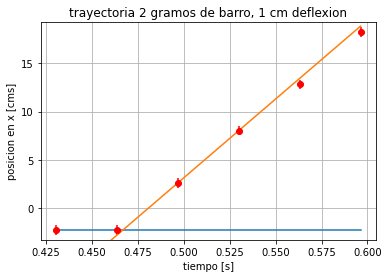

[163.62922705314017, 30.68728631356626]

In [72]:
## datos y grafica 2g 1cm (eje x)

xes = np.array([0.43060,0.46372,0.49684,0.52996,0.56308,0.59621])     # tiempo                                                                                                                      
yes = [-2.27411,-2.2741,2.6128,8.0322,12.822,18.241] #  posicion en x (confuso, lo entiendo..)
indiceImpulso=2
dt =xes[indiceImpulso+1]-xes[indiceImpulso] 

#Minimo tiempo entre fotos (entre dos)
incertx=0.00005 
# Minima medida de espacio entre 2 (.5 cm mas error humano 1cm) 
incerty = 0.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en x [cms]", "trayectoria 2 gramos de barro, 1 cm deflexion")
    
# velocidad
velx= (yes[indiceImpulso+1]-yes[indiceImpulso])/dt; ## velocidad despues del impulso
incertvelx = ((2*incertx)/np.abs(dt)) + 2*incerty/np.abs((yes[indiceImpulso+1]-yes[indiceImpulso]))
[velx,incertvelx*velx]


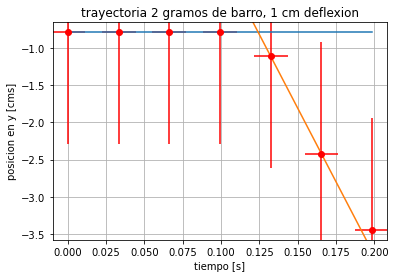

In [4]:
## datos y grafica 2g 1cm (eje y)

xes = np.array([0,0.03321,0.06624,0.09941, 0.13247,0.16554,0.19861])     # tiempo                                                                                                                      
yes = [-0.78718,-0.78718,-0.78718,-0.78718,-1.1134,-2.4229,-3.44636] #  posicion en y (confuso, lo entiendo..)



indiceImpulso=4 # en que foto empieza el movimiento
dt =xes[indiceImpulso+1]-xes[indiceImpulso] 
#Minimo tiempo entre fotos (entre dos)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en y [cms]", "trayectoria 2 gramos de barro, 1 cm deflexion")
    

In [13]:
'''
datos
2 gramos, 2 cm deflexion
t[s], x[cm], y[cm]
0.000000000E0	-2.516119941E0	-5.322561414E-1
3.312222222E-2	-2.516119941E0	-5.322561414E-1
6.624444444E-2	-2.370959175E0	-6.290299853E-1
9.936666667E-2	6.629008307E0	-1.451607658E-1
1.324888889E-1	1.437091582E1	3.387084536E-1
1.656111111E-1	2.051605491E1	4.838692195E-1
'''

t[s], x[cm], y[cm]
-0.53,-0.53,-0.62,-0.14,0.33,0.48

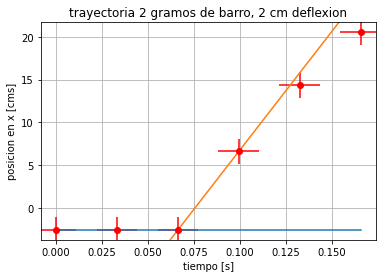

In [5]:
## datos y grafica 2g 2cm (eje x)

xes = np.array([0,0.03312,0.066244,0.099366, 0.13248,0.16561])     # tiempo                                                                                                                      
yes = [-2.5161,-2.5161,-2.5161,6.6290,14.3709,20.5160] #  posicion en x (confuso, lo entiendo..)



indiceImpulso=2 # en que foto empieza el movimiento
dt =xes[indiceImpulso+1]-xes[indiceImpulso] 
#Minimo tiempo entre fotos (entre dos)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en x [cms]", "trayectoria 2 gramos de barro, 2 cm deflexion")
    

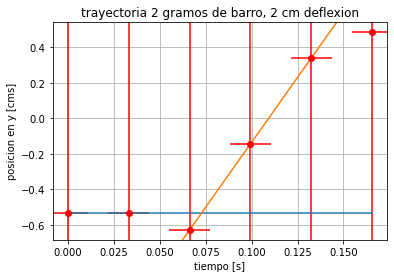

In [6]:
## datos y grafica 2g 2cm (eje y)

xes = np.array([0,0.03312,0.066244,0.099366, 0.13248,0.16561])     # tiempo                                                                                                                      
yes = [-0.53225,-0.53225,-0.629029,-0.14516,0.33870,0.48386] #  posicion en y (confuso, lo entiendo..)



indiceImpulso=2 # en que foto empieza el movimiento
dt =xes[indiceImpulso+1]-xes[indiceImpulso] 
#Minimo tiempo entre fotos (entre dos)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en y [cms]", "trayectoria 2 gramos de barro, 2 cm deflexion")
    

In [ ]:
'''
datos
2 gramos, 3 cm deflexion
t[s], x[cm], y[cm]

4.306000000E-1	-2.274185331E0	-8.225776731E-1
4.637222222E-1	-2.274185331E0	-8.225776731E-1
4.968444444E-1	2.612893785E0	-1.306446893E0
5.299666667E-1	8.032229043E0	-1.741929190E0
5.630888889E-1	1.282253432E1	-1.741929190E0
5.962111111E-1	1.824186957E1	-1.887089956E0
'''



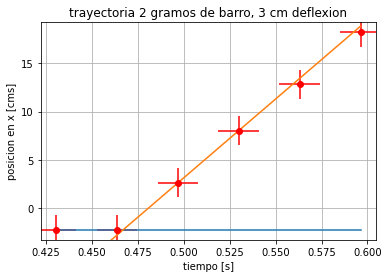

In [7]:
## datos y grafica 2g 3cm (eje x)

xes = np.array([0.43060,0.46372,0.49684,0.52996,0.56308,0.59621])     # tiempo                                                                                                                      
yes = [-2.27411,-2.2741,2.6128,8.0322,12.822,18.241] #  posicion en x (confuso, lo entiendo..)


indiceImpulso=2 # en que foto empieza el movimiento
dt =xes[indiceImpulso+1]-xes[indiceImpulso] 
#Minimo tiempo entre fotos (entre dos)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en x [cms]", "trayectoria 2 gramos de barro, 3 cm deflexion")
    

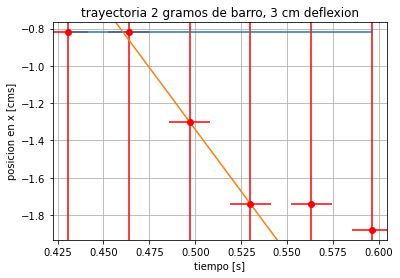

In [10]:
## datos y grafica 2g 3cm (eje y)

xes = np.array([0.43060,0.46372,0.49684,0.52996,0.56308,0.59621])     # tiempo                                                                                                                      
yes = [-0.82,-0.82,-1.30,-1.74,-1.74,-1.88]

indiceImpulso=2 # en que foto empieza el movimiento
dt =xes[indiceImpulso+1]-xes[indiceImpulso] 
#Minimo tiempo entre fotos (entre dos)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en x [cms]", "trayectoria 2 gramos de barro, 3 cm deflexion")
    

In [ ]:
'''
datos
4 gramos, 1 cm deflexion
t[s], x[cm], y[cm]
0.199	-2.078	-0.447
0.232	-2.078	-0.447
0.265	-2.078	-0.447
0.298	-1.788	-0.348
0.331	0.729	-0.577
0.364	4.650	-0.846
0.397	7.410	-1.170
0.431	9.684	-1.206
0.464	11.72	-1.388
0.497	13.70	-1.474
0.530	15.54	-1.513
0.563	17.09	-1.795
0.596	18.54	-1.932
0.629	19.75	-2.022
0.662	20.67	-2.114
0.695	21.06	-2.306
0.729	21.30	-2.353
0.762	21.40	-2.400
0.795	21.40	-2.400
'''







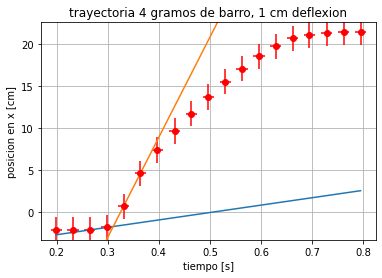

In [11]:
## datos y grafica 4g 1cm (eje x)

xes = np.array([0.199,0.232,0.265,0.298,0.331,0.364,0.397,0.431,0.464,0.497,0.530,0.563,0.596,0.629,0.662,0.695,0.729,0.762,0.795])     # tiempo                                                                                                                      

yes = [-2.078,-2.078,-2.078,-1.788,0.729,4.650,7.410,9.684,11.72,13.70,15.54,17.09,18.54,19.75,20.67,21.06,21.30,21.40,21.40] #  posicion en x (confuso, lo entiendo..)
indiceImpulso=4 # en que foto empieza el movimiento


dt =xes[indiceImpulso+1]-xes[indiceImpulso] 
#Minimo tiempo entre fotos (entre tres)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en x [cm]", "trayectoria 4 gramos de barro, 1 cm deflexion")
    

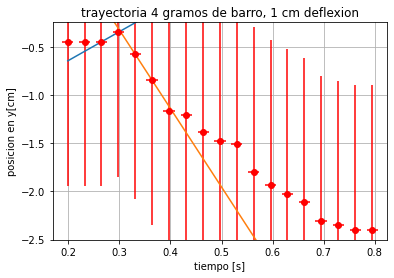

In [12]:
## datos y grafica 4g 1cm (eje y)

xes = np.array([0.199,0.232,0.265,0.298,0.331,0.364,0.397,0.431,0.464,0.497,0.530,0.563,0.596,0.629,0.662,0.695,0.729,0.762,0.795])     # tiempo                                                                                                                      

yes = [-0.447,-0.447,-0.447,-0.348,-0.577,-0.846,-1.170,-1.206,-1.388,-1.474,-1.513,-1.795,-1.932,-2.022,-2.114,-2.306,-2.353,-2.400,-2.400]
indiceImpulso=4 # en que foto empieza el movimiento


dt =xes[indiceImpulso+1]-xes[indiceImpulso] 
#Minimo tiempo entre fotos (entre tres)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en y[cm]", "trayectoria 4 gramos de barro, 1 cm deflexion")
    

In [ ]:
'''

datos
4 gramos, 2 cm deflexion
t[s], x[cm], y[cm]
0.000	-2.329	-0.556
0.033	-2.329	-0.556
0.066	-2.329	-0.556
0.099	2.121	-0.797
0.132	10.54	-1.226
0.166	18.80	-1.895
'''


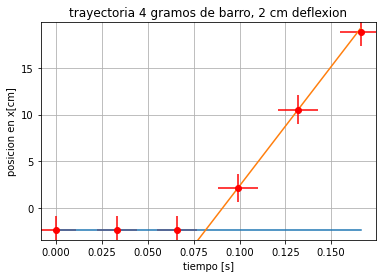

In [13]:
## datos y grafica 4g 2cm (eje x)

xes = np.array([0,0.033,0.066,0.099,0.132,0.166])     # tiempo                                                                                                                      

yes = [-2.329,-2.329,-2.329,2.121,10.54,18.80]
indiceImpulso=3 # en que foto empieza el movimiento


dt =xes[indiceImpulso+1]-xes[indiceImpulso] 
#Minimo tiempo entre fotos (entre tres)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en x[cm]", "trayectoria 4 gramos de barro, 2 cm deflexion")
    

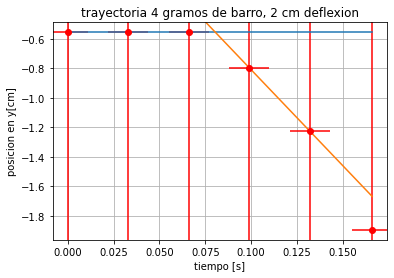

In [14]:
## datos y grafica 4g 2cm (eje y)

xes = np.array([0,0.033,0.066,0.099,0.132,0.166])     # tiempo                                                                                                                      

yes = [-0.556,-0.556,-0.556,-0.797,-1.226,-1.895]
indiceImpulso=3 # en que foto empieza el movimiento


dt =xes[indiceImpulso+1]-xes[indiceImpulso] 
#Minimo tiempo entre fotos (entre tres)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en y[cm]", "trayectoria 4 gramos de barro, 2 cm deflexion")
    

In [ ]:
'''

datos
4 gramos, 3 cm deflexion
t[s], x[cm], y[cm]
0.199	-2.847	-0.201
0.232	-2.847	-0.201
0.265	-2.847	-0.201
0.298	-2.847	-0.201
0.331	0.676	-0.143
0.364	4.584	6.055E-2
0.397	9.024	-2.406E-2
0.430	13.27	-0.157
0.464	16.75	-0.148
0.497	20.17	-9.069E-2
'''



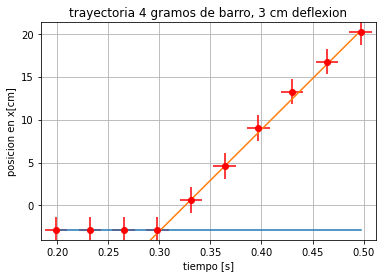

In [15]:
## datos y grafica 4g 3cm (eje x)

xes = np.array([0.199,0.232,0.265,0.298,0.331,0.364,0.397,0.430,0.464,0.497])     # tiempo                                                                                                                      

yes = [-2.847,-2.847,-2.847,-2.847,0.676,4.584,9.024,13.27,16.75,20.17]
indiceImpulso=4 # en que foto empieza el movimiento


dt =xes[indiceImpulso+1]-xes[indiceImpulso] 
#Minimo tiempo entre fotos (entre tres)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en x[cm]", "trayectoria 4 gramos de barro, 3 cm deflexion")
    

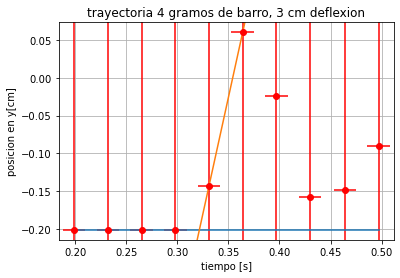

In [16]:
## datos y grafica 4g 3cm (eje y)

xes = np.array([0.199,0.232,0.265,0.298,0.331,0.364,0.397,0.430,0.464,0.497])     # tiempo                                                                                                                      

yes = [-0.201,-0.201,-0.201,-0.201,-0.143,0.060,-0.024,-0.157,-0.148,-0.090]
indiceImpulso=4 # en que foto empieza el movimiento


dt =xes[indiceImpulso+1]-xes[indiceImpulso] 
#Minimo tiempo entre fotos (entre tres)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en y[cm]", "trayectoria 4 gramos de barro, 3 cm deflexion")
    

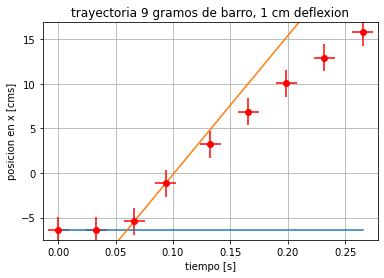

In [17]:
## datos y grafica 9g 1cm (eje x)

xes = np.array([0,0.03312,0.06624,0.0936, 0.13248,0.16561,0.19873,0.23185,0.26497])     # tiempo                                                                                                                      
yes = [-6.385,-6.385,-5.4175,-1.1607,3.1931,6.87065,10.0636,12.9182,15.772] #  posicion en x (confuso, lo entiendo..)

indiceImpulso=2 # en que foto empieza el movimiento
dt =xes[indiceImpulso+1]-xes[indiceImpulso] 

#Minimo tiempo entre fotos (entre dos)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en x [cms]", "trayectoria 9 gramos de barro, 1 cm deflexion")
    

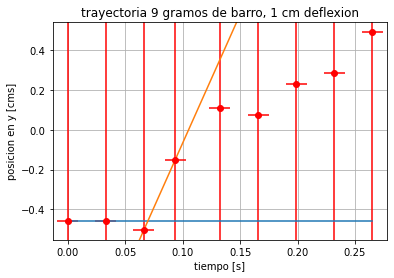

In [18]:
## datos y grafica 9g 1cm (eje y)

xes = np.array([0,0.03312,0.06624,0.0936, 0.13248,0.16561,0.19873,0.23185,0.26497])     # tiempo                                                                                                                      
yes = [-0.45757,-0.45757,-0.50261,-0.14917,0.10782,0.072160,0.22836,0.286633,0.49005] #  posicion en x (confuso, lo entiendo..)

indiceImpulso=2 # en que foto empieza el movimiento
dt =xes[indiceImpulso+1]-xes[indiceImpulso] 


#Minimo tiempo entre fotos (entre dos)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en y [cms]", "trayectoria 9 gramos de barro, 1 cm deflexion")
    

In [ ]:
'''
datos
9 gramos, 1 cm deflexion
t[s], x[cm], y[cm]
0.000000000E0	-6.385459397E0	-4.575751995E-1
3.312222222E-2	-6.385459397E0	-4.575751995E-1
6.624444444E-2	-5.417569815E0	-5.026127877E-1
9.936666667E-2	-1.160764309E0	-1.491765469E-1
1.324888889E-1	3.193148263E0	1.078223302E-1
1.656111111E-1	6.870659883E0	7.216059677E-2
1.987333333E-1	1.006364072E1	2.283690348E-1
2.318555556E-1	1.291825366E1	2.866332753E-1
2.649777778E-1	1.577236431E1	4.900558393E-1
'''


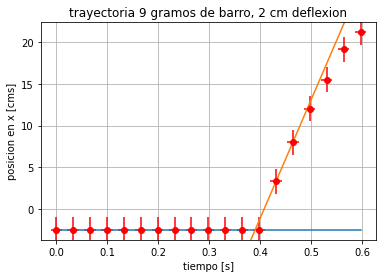

In [19]:
## datos y grafica 9g 2cm (eje x)

xes = np.array([0,0.03317,0.06624,0.09931, 0.13237,0.16557,0.1987,0.23181,0.26484,0.29806,0.33118,0.36431,0.39743,0.43055,0.46367,0.49680,0.52992,0.56304,0.59616])     # tiempo                                                                                                                      
yes = [-2.5563,-2.5563,-2.5563,-2.5563,-2.5563,-2.5563,-2.5563,-2.5563,-2.5563,-2.5563,-2.5563,-2.5563,-2.5563,3.2813,8.010,12.0154,15.537,19.157,21.232] #  posicion en x (confuso, lo entiendo..)

indiceImpulso=13 # en que foto empieza el movimiento
dt =xes[indiceImpulso+1]-xes[indiceImpulso] 


#Minimo tiempo entre fotos (entre dos)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en x [cms]", "trayectoria 9 gramos de barro, 2 cm deflexion")
    

In [ ]:
'''
datos
9 gramos, 2 cm deflexion
t[s], x[cm], y[cm]
0.000000000E0	-2.556335611E0	-4.893906031E-1
3.317777778E-2	-2.556335611E0	-4.893906031E-1
6.624444444E-2	-2.556335611E0	-4.893906031E-1
9.931111111E-2	-2.556335611E0	-4.893906031E-1
1.323777778E-1	-2.556335611E0	-4.893906031E-1
1.655777778E-1	-2.556335611E0	-4.893906031E-1
1.987777778E-1	-2.556335611E0	-4.893906031E-1
2.318111111E-1	-2.556335611E0	-4.893906031E-1
2.648444444E-1	-2.556335611E0	-4.893906031E-1
2.980666667E-1	-2.556335611E0	-4.893906031E-1
3.311888889E-1	-2.556335611E0	-4.893906031E-1
3.643111111E-1	-2.556335611E0	-4.893906031E-1
3.974333333E-1	-7.718550716E-1	-9.857302181E-2
4.305555556E-1	3.281349195E0	5.700763533E-2
4.636777778E-1	8.010023163E0	2.626469158E-1
4.968000000E-1	1.201548514E1	2.250707770E-1
5.299222222E-1	1.553760473E1	4.757499499E-1
5.630444444E-1	1.915726786E1	3.406302725E-1
5.961666667E-1	2.123206268E1	4.426778003E-1
'''


3.311888889E-1	-2.556335611E0	
3.643111111E-1	-2.556335611E0	
3.974333333E-1	-7.718550716E-1	
4.305555556E-1	3.281349195E0	
4.636777778E-1	8.010023163E0	
4.968000000E-1	1.201548514E1	
5.299222222E-1	1.553760473E1	
5.630444444E-1	1.915726786E1	
5.961666667E-1	2.123206268E1	



[-0.48939,-0.489390,-0.48939,-0.489390,-0.48939,-0.489390,-0.48939,-0.489390,-0.48939,-0.489390,-0.48939,-0.489390,-0.489390,-0.09857,0.05700,0.26264691,0.225070,0.47574,0.34063,0.44267]

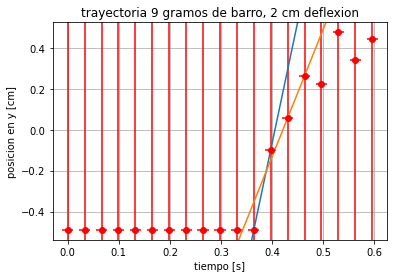

In [20]:
## datos y grafica 9g 2cm (eje y)

xes = np.array([0,0.03317,0.06624,0.09931, 0.13237,0.16557,0.1987,0.23181,0.26484,0.29806,0.33118,0.36431,0.39743,0.43055,0.46367,0.49680,0.52992,0.56304,0.59616])     # tiempo                                                                                                                      
yes = [-0.489390,-0.48939,-0.489390,-0.48939,-0.489390,-0.48939,-0.489390,-0.48939,-0.489390,-0.48939,-0.489390,-0.489390,-0.09857,0.05700,0.26264691,0.225070,0.47574,0.34063,0.44267]


indiceImpulso=13 # en que foto empieza el movimiento
dt =xes[indiceImpulso+1]-xes[indiceImpulso] 


#Minimo tiempo entre fotos (entre tres..)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en y [cm]", "trayectoria 9 gramos de barro, 2 cm deflexion")
    

In [ ]:
'''
datos
9 gramos, 3 cm deflexion
t[s], x[cm], y[cm]
0.000	-2.371	0.484
0.033	-2.371	0.484
0.066	-2.371	0.484
0.099	-2.032	0.484
0.132	4.452	0.387
0.166	10.02	0.194
0.199	15.34	-0.242
0.232	20.47	-4.839E-2



## vector tiempo
[0.000,0.033,0.066,0.099,0.132,0.166,0.199,0.232]

## vector yes
[0.484,0.484,0.484,0.484,0.387,0.194,-0.242,-4.839E-2]

## vector xes
[-2.371,-2.371,-2.371,-2.032,4.452,10.02,15.34,20.47]

'''

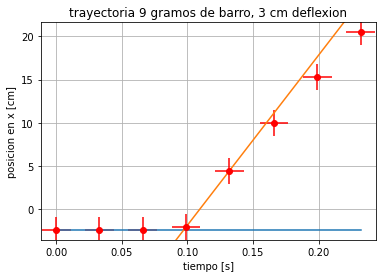

In [21]:
## datos y grafica 9g 3cm (eje x)

xes = np.array([0.000,0.033,0.066,0.099,0.132,0.166,0.199,0.232])
yes = [-2.371,-2.371,-2.371,-2.032,4.452,10.02,15.34,20.47]



indiceImpulso=3 # en que foto empieza el movimiento
dt =xes[indiceImpulso+1]-xes[indiceImpulso] 


#Minimo tiempo entre fotos (entre tres..)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty =1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en x [cm]", "trayectoria 9 gramos de barro, 3 cm deflexion")
    

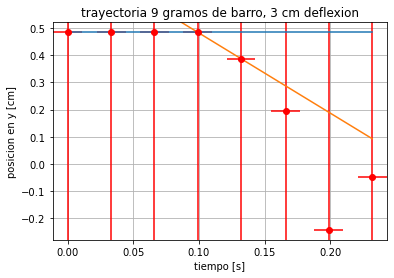

In [22]:
## datos y grafica 9g 3cm (eje y)

xes = np.array([0.000,0.033,0.066,0.099,0.132,0.166,0.199,0.232])
yes = [0.484,0.484,0.484,0.484,0.387,0.194,-0.242,-4.839E-2]



indiceImpulso=3 # en que foto empieza el movimiento
dt =xes[indiceImpulso+1]-xes[indiceImpulso] 


#Minimo tiempo entre fotos (entre tres..)
incertx=dt/3 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 1.5 


graficaDatos(xes, yes, incertx, incerty,indiceImpulso,"tiempo [s]", "posicion en y [cm]", "trayectoria 9 gramos de barro, 3 cm deflexion")
    

In [16]:
3*3*3*3*3*3*3


2187

# MRUA


In [1]:
## Ukiyo-Neko Systems
### least squares module

import numpy as np
### least squares function description
## we are given a data set D consisting of pairs of points (x,y)
## first entry is assumed to be independent variable x
## second entry assumed to be dependent variable y
## the shape of D is =[[a,b],[c,d],..,[y,z]]

## the implementation requires data to be separated by variable into vectors
## thus vectorify takes a dataset like
## D = [[x1,y1],[x2,y2],[x3,y3]..]
## and takes it to vectorify(D)=[[x1,x2,x3],[y1,y2,y3]]

def vectorify(datavec):
    xes=[]
    yes=[]
    for i in datavec:
        xes.append(i[0])
        yes.append(i[1])
    return([xes,yes])

## least squares takes the result of vectorify on the specified dataset D

def leastSquares(dvec):
    x= dvec[0]
    y = dvec[1]
    N = len(x)
    v1= np.ones(N)
    mnumerador =    N* np.dot(x,y)-(np.dot(v1,x)*np.dot(v1,y))
    mdenominador = N* np.dot(x,x)-(np.dot(v1,x)*np.dot(v1,x))
    m=mnumerador/mdenominador
    b= (np.dot(v1,y) - m *np.dot(v1,x))/N
    return [m,b]

In [2]:
D=[[1,2,3],[2,4,6]]
leastSquares(D)[0]

2.0

In [3]:
## Ukiyo neko systems                                                                                                                       
## usando matplotlib para yegraficar datos bidimensionales                                                                                  
import matplotlib.pyplot as plt
import numpy as np

## aqui van los datos                                                                                                                       

#xes = [2,4,6,8]                                                                                                                            
#yes = [0.9,0.72,0.54,0.5] # 3V                                                                                                             
#yes = [0.24,0.18,0.16,0.13] # 6V                                                                                                           
#yes = [0.42,0.33,0.26,0.22] # 9V                                                                                                           
#yes = [0.57,0.44,0.35,0.30] # 12V                                                                                                          
#yes = [0.74,0.55,0.44,0.38] # 15V                                                                                                          


def graficaDatos(xes, yes,incertx,incerty, xlabel, ylabel, titulo):

## xes -> variable independiente
## yes -> variable dependiente
## incertx -> incertidumbre var indep
## incerty -> incertidumbre var dep
## xlabel -> lo que dice en la variable independiente
## ylabel -> lo mismo pero para la dependiente
## titulo -> ??


## usamos un poco de automagia para autodeterminar los limites de                                                                           
## la grafica                                                                                                                               
# eje x                                                                                                                                     
    xprincipio=min(xes)
    xfin=max(xes)
    xintervalo = xfin-xprincipio
    xescalar = xintervalo/15 # el numero por que multiplicamos intervalo cambia que tanto                                                   
    #espacio blanco dejamos a las esquinas                                                                                                  
    # eje y                                                                                                                                 
    yprincipio=min(yes)
    yfin= max(yes)
    yintervalo=yfin-yprincipio
    yescalar = yintervalo/15
    
    ## ajustamos los limites de la grafica automagicamente                                                                                  
    plt.axis([xprincipio-xescalar-incertx, xfin+xescalar+incertx, yprincipio-yescalar-incerty, yfin+yescalar+incerty])


    plt.grid(True)
    ## titulo, y esas cosas                                                                                                                 
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    ## linea autoajustada
    ajuste = leastSquares([xes,yes])
    pendiente = ajuste[0]
    ordenada = ajuste[1]
    
    plt.plot(xes, np.multiply(pendiente,xes) + ajuste[1], label='y='+str(ajuste[0])+'*x+'+str(ajuste[1]))
 
    ## texto flotante
    posx= xfin+xescalar+incertx-(xprincipio-xescalar-incertx) # toda la graf en x 
    posx *= 0.05 ## la encogemos una proporcion chica
    posx += xprincipio-xescalar-incertx  ## le sumamos el minimo en x
    
    posy= yfin+yescalar+incerty-(yprincipio-yescalar-incerty) # toda la graf en y
    posy *=0.05
    posy += yprincipio-yescalar-incerty
    
    texto = f'fit(x)={ajuste[0]:.2f}x+{ajuste[1]:.2f}'
    plt.text(posx, posy, texto, style='italic',bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})

    
    ## finalmente hacemos la grafica                                                                                                        
    plt.errorbar(xes,yes, xerr=incertx, yerr=incerty, fmt='ro')
    #plt.legend(loc='best')
    plt.show()
    # print (fit)



In [4]:
np.multiply([4],[1,2])

array([4, 8])

In [5]:
## Ukiyo neko systems                                                                                                                       
## usando matplotlib para yegraficar datos bidimensionales                                                                                  
import matplotlib.pyplot as plt
import numpy as np

## aqui van los datos                                                                                                                       

#xes = [2,4,6,8]                                                                                                                            
#yes = [0.9,0.72,0.54,0.5] # 3V                                                                                                             
#yes = [0.24,0.18,0.16,0.13] # 6V                                                                                                           
#yes = [0.42,0.33,0.26,0.22] # 9V                                                                                                           
#yes = [0.57,0.44,0.35,0.30] # 12V                                                                                                          
#yes = [0.74,0.55,0.44,0.38] # 15V                                                                                                          


def graficaEspacio(xes, yes,incertx,incerty, xlabel, ylabel, titulo):

## xes -> variable independiente
## yes -> variable dependiente
## incertx -> incertidumbre var indep
## incerty -> incertidumbre var dep
## indiceImpulso -> elemento de la serie de tiempo en que se imprime el impulso sobre la masa (recuerda que los indices empiezan en 0)


## usamos un poco de automagia para autodeterminar los limites de                                                                           
## la grafica                                                                                                                               
# eje x                                                                                                                                     
    xprincipio=min(xes)
    xfin=max(xes)
    xintervalo = xfin-xprincipio
    xescalar = xintervalo/15 # el numero por que multiplicamos intervalo cambia que tanto                                                   
    #espacio blanco dejamos a las esquinas                                                                                                  
    # eje y                                                                                                                                 
    yprincipio=min(yes)
    yfin= max(yes)
    yintervalo=yfin-yprincipio
    yescalar = yintervalo/15
    
    ## ajustamos los limites de la grafica automagicamente                                                                                  
    plt.axis([xprincipio-xescalar-incertx, xfin+xescalar+incertx, yprincipio-xescalar-incerty, yfin+xescalar+incerty])

    plt.grid(True)
    ## titulo, y esas cosas                                                                                                                 
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

## linea autoajustada
#    fit = np.polyfit(xes,yes,1)
#    linea = np.poly1d(fit)
#    plt.plot(xes, linea(xes), label='y='+str(fit[0])+'*x+'+str(fit[1]))
 

    
    ## finalmente hacemos la grafica                                                                                                        
    plt.errorbar(xes,yes, xerr=incertx, yerr=incerty, fmt='ro')
    #plt.legend(loc='best')
    plt.show()
    # print (fit)



In [6]:
max([1,2,3])

3

In [7]:
## queremos un graficador que pueda graficar incertidumbres que cambian con cada datapoint

def graficaIncertRelativas(xes, yes,incertx,incerty, xlabel, ylabel, titulo):

## xes -> variable independiente
## yes -> variable dependiente
## incertx -> incertidumbre var indep se asume un escalar constante
## incerty -> incertidumbre var dep (un vector del mismo tamanio que yes)
## indiceImpulso -> elemento de la serie de tiempo en que se imprime el impulso sobre la masa (recuerda que los indices empiezan en 0)


## usamos un poco de automagia para autodeterminar los limites de                                                                           
## la grafica                                                                                                                               
# eje x                                                                                                                                     
    xprincipio=min(xes)
    xfin=max(xes)
    xintervalo = xfin-xprincipio
    xescalar = xintervalo/15 # el numero por que multiplicamos intervalo cambia que tanto                                                   
    #espacio blanco dejamos a las esquinas                                                                                                  
    # eje y                                                                                                                                 
    yprincipio=min(yes)
    yfin= max(yes)
    yintervalo=yfin-yprincipio
    yescalar = yintervalo/15
    
    
    ## para encontrar la incertidumbre mas grande, tenemos que multiplicar la incertidumbre relativa por la medida
    foo=abs(np.multiply(yes, incerty))
    ## ajustamos los limites de la grafica automagicamente                                                                                  
    plt.axis([xprincipio-xescalar-max(incertx), xfin+xescalar+max(incertx), yprincipio-xescalar, yfin+xescalar])

    plt.grid(True)
    ## titulo, y esas cosas                                                                                                                 
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

## linea autoajustada
#    fit = np.polyfit(xes,yes,1)
#    linea = np.poly1d(fit)
#    plt.plot(xes, linea(xes), label='y='+str(fit[0])+'*x+'+str(fit[1]))
 

    
    ## finalmente hacemos la grafica                                                                                                        
    plt.errorbar(xes,yes, xerr=incertx, yerr=foo, fmt='ro')
    #plt.legend(loc='best')
    plt.show()
    # print (fit)



In [8]:
range(3)

range(0, 3)

In [9]:
## velocity calculator
## given a vector of dependent variables and one of independent variables
## return a velocity vector 
## observe that to acquire a velocity we need two points to compare. thus the first and last elements of the 
## vector are problematic, therefore, given a n length vector, we return a n-2 length vector
## note that the velocity obtained by this is only good if the independent variable step is small


## velocity (independent var, dependent var)
## ie velocity(x, x^2) or something like that

def velocity(xes,yes):
    vels = []
    for i in range(1,len(xes)-1):
        if xes[i]-xes[i-1] != 0:
            v = (yes[i] - yes[i-1])/(xes[i]-xes[i-1])
            vels.append(v)
        else:
            v = 0
            vels.append(v)

    return(vels)

In [10]:
## we want to write velocity uncertainty
## given a velocity measurement, we return a 2 vector encoding
## the velocity measurement and the relative uncertainty
## xes es variable independiente (longitud, tiempo ets)
## yes es variable dependiente (volumen, velocidad, ect)
def veluncert(xes,yes,ix,iy):
    vels = []
    dvels=[]
    for i in range(1,len(xes)-1):
        if xes[i]-xes[i-1] != 0:
            dt= xes[i]-xes[i-1]
            dx = yes[i]-yes[i-1]
            v = dx/dt
            vels.append(v)
            ## dv es la incertidumbre en la velocidad
            dv = (2*ix)/abs(dt)
            dv += (2*iy)/abs(dx)
            dvels.append(dv)
        else:
            v = 0
            vels.append(v)
            dvels.append(0)

    return([vels,dvels])
    

In [11]:
## we want to measure standard deviation
## average helper function
def avgvec(dvec):
    unos=np.ones(len(dvec))
    
    avg=np.dot(dvec, unos)
    avg*= 1/len(dvec)
    return avg

def stdvec(dvec):
    suma=0
    promedio=avgvec(dvec)
    for i in dvec:
        suma+=(i-promedio)*(i-promedio)
    suma *= 1/len(dvec)
    res = np.sqrt(suma)
    return res

In [12]:
avgvec([0,2,4]), stdvec([-1,2,5])

(2.0, 2.449489742783178)

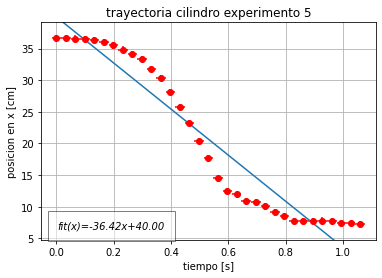

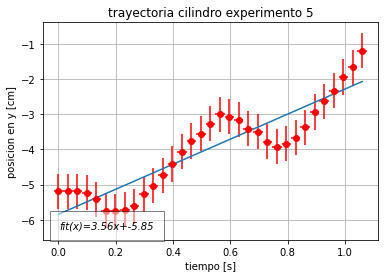

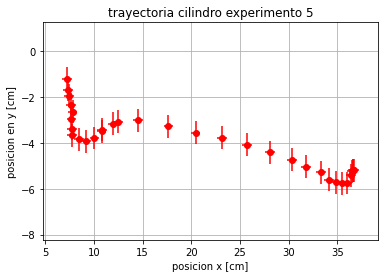

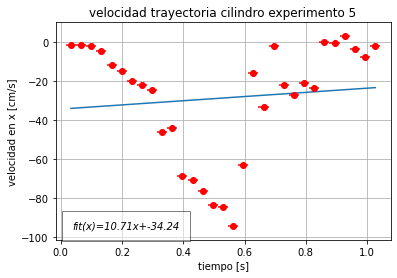

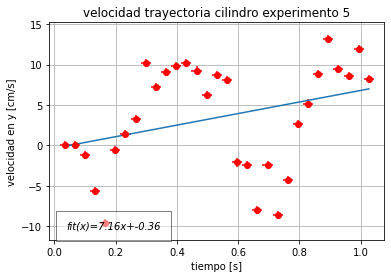

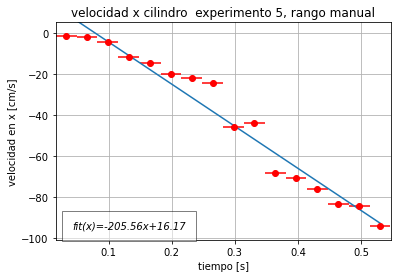

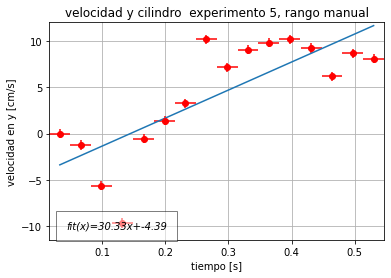

In [13]:
import csv

datt=[];
with open('./MRUA/ex6/ex6cilindro', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria cilindro experimento 5")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria cilindro experimento 5")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria cilindro experimento 5")
 



vcx5=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vcx5, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria cilindro experimento 5")

vcy5=velocity(tiempop,yes)
vcxi5=veluncert(tiempop,xes,dt,dx)

graficaDatos(tiempop[1:len(tiempop)-1], vcy5, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria cilindro experimento 5")

## begin manual fit
## zoom in for better fit

loindx=1 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-16 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vcxi5[0][loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x cilindro  experimento 5, rango manual")
graficaDatos(tiempop[loindx:hindx], vcy5[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y cilindro  experimento 5, rango manual")

## end manual fit



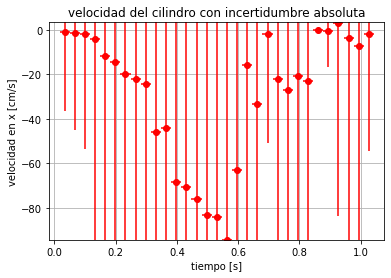

In [14]:
vcxi5=veluncert(tiempop,xes,dt,dx)

loindx=1 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-2 ## must be smaller than len(xes)

absoluteUncertV=[]
indx=0
for i in range(len(vcxi5[0])):
    absoluteUncertV.append(vcxi5[1][indx]*vcxi5[0][indx])
    indx+=1
    

## time uncertainty is constant but needs to be input as vector because uh... im bad program
dtv=dt*np.ones(len(vcxi5[0]))
graficaIncertRelativas(tiempop[loindx:hindx+1], vcxi5[0],dtv,np.multiply(vcxi5[0],vcxi5[1]), "tiempo [s]", "velocidad en x [cm/s]", "velocidad del cilindro con incertidumbre absoluta")


In [15]:
dt*np.ones(len(vcxi5[0]))

array([-0.0165, -0.0165, -0.0165, -0.0165, -0.0165, -0.0165, -0.0165,
       -0.0165, -0.0165, -0.0165, -0.0165, -0.0165, -0.0165, -0.0165,
       -0.0165, -0.0165, -0.0165, -0.0165, -0.0165, -0.0165, -0.0165,
       -0.0165, -0.0165, -0.0165, -0.0165, -0.0165, -0.0165, -0.0165,
       -0.0165, -0.0165, -0.0165])

In [16]:
velocity([1,2,3,4,5],[1,4,9,16,25])
velocity([1,2,3,4,5],[1,4,9,16,25])

[3.0, 5.0, 7.0]

In [17]:
## linea autoajustada
xes=[0.000,0.033,0.066,0.099,0.132,0.166,0.199,0.232,0.265,0.298,0.331,0.364,0.397,0.430,0.464,0.497,0.530,0.563,0.596,0.629,0.662,0.696,0.729,0.762,0.795,0.828,0.861,0.894,0.927,0.960,0.994,1.027,1.060,1.093,1.126,1.159,1.192,1.225,1.259,1.292,1.325,1.358,1.391,1.424,1.457,1.490,1.523,1.557,1.590,1.623,1.656,1.689,1.722,1.755,1.788,1.821,1.855,1.888,1.921,1.954,1.987,2.020,2.053,2.086]
yes=[53.74,53.74,53.74,53.71,53.71,53.70,53.62,53.63,53.43,53.10,52.81,52.47,52.04,51.54,50.83,50.04,49.22,48.48,47.34,46.25,45.24,44.02,42.74,41.32,39.98,38.61,36.98,35.35,33.89,31.91,30.27,28.39,26.67,24.91,22.94,21.18,19.03,17.10,14.95,12.77,10.70,9.199,7.951,6.745,5.797,4.764,3.691,2.787,1.673,0.637,-9.159E-2,-0.737,-1.037,-1.209,-1.382,-1.813,-2.246,-2.808,-3.325,-3.798,-4.268,-5.042,-5.641,-6.200]

ajuste = leastSquares([xes,yes])
pendiente = ajuste[0]
ordenada = ajuste[1]


## resultados experimento 1 (ex2)

-0.033


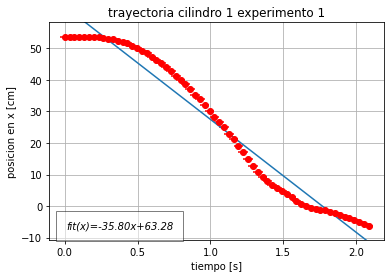

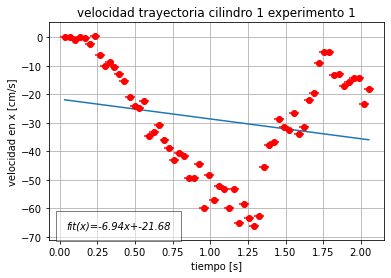

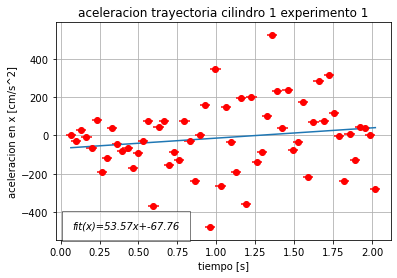

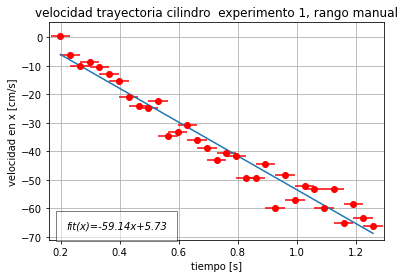

19.100543576696044


In [18]:
# cilindro ex2 eje x
tiempop=[0.000,0.033,0.066,0.099,0.132,0.166,0.199,0.232,0.265,0.298,0.331,0.364,0.397,0.430,0.464,0.497,0.530,0.563,0.596,0.629,0.662,0.696,0.729,0.762,0.795,0.828,0.861,0.894,0.927,0.960,0.994,1.027,1.060,1.093,1.126,1.159,1.192,1.225,1.259,1.292,1.325,1.358,1.391,1.424,1.457,1.490,1.523,1.557,1.590,1.623,1.656,1.689,1.722,1.755,1.788,1.821,1.855,1.888,1.921,1.954,1.987,2.020,2.053,2.086]
# tiempo

yes=[53.74,53.74,53.74,53.71,53.71,53.70,53.62,53.63,53.43,53.10,52.81,52.47,52.04,51.54,50.83,50.04,49.22,48.48,47.34,46.25,45.24,44.02,42.74,41.32,39.98,38.61,36.98,35.35,33.89,31.91,30.27,28.39,26.67,24.91,22.94,21.18,19.03,17.10,14.95,12.77,10.70,9.199,7.951,6.745,5.797,4.764,3.691,2.787,1.673,0.637,-9.159E-2,-0.737,-1.037,-1.209,-1.382,-1.813,-2.246,-2.808,-3.325,-3.798,-4.268,-5.042,-5.641,-6.200]
# posicion en x

dt = tiempop[1]-tiempop[2]
#Minimo tiempo entre fotos (entre tres..)
incertx=dt
print(dt)
# Minima medida de espacio entre 2 (.5 cm)
incerty = 0.5

ajuste = leastSquares([tiempop,yes])
graficaDatos(tiempop, yes, incertx, incerty,"tiempo [s]", "posicion en x [cm]", "trayectoria cilindro 1 experimento 1")

##foo=veluncert(tiempop,yes,incertx, incerty)

vcx1=velocity(tiempop,yes)
ajuste = leastSquares([tiempop[1:len(tiempop)-1], vcx1])
acx1= velocity(tiempop[1:len(tiempop)-1],vcx1)
graficaDatos(tiempop[1:len(tiempop)-1], vcx1, incertx, incerty,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria cilindro 1 experimento 1")
graficaDatos(tiempop[2:len(tiempop)-2], acx1, incertx, incerty,"tiempo [s]", "aceleracion en x [cm/s^2]", "aceleracion trayectoria cilindro 1 experimento 1")

## begin manual fit
## zoom in for better fit

loindx=6 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(tiempop)-25 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vcx1[loindx:hindx], incertx, incerty,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria cilindro  experimento 1, rango manual")
##graficaDatos(tiempop[loindx:hindx], vcy1[loindx:hindx], incerty, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria cilindro  experimento 1, rango manual")
## end manual fit
print(stdvec(vcx1[loindx:hindx]))


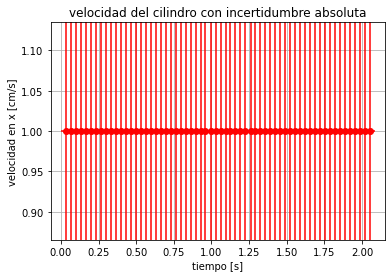

(62, 62, 62)

In [19]:
vcxi1=veluncert(tiempop,xes,dt,dx)

loindx=1 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(vcxi1[0])+1 ## must be smaller than len(xes)

absoluteUncertV=[]
indx=0
for i in range(len(vcxi1[0])):
    absoluteUncertV.append(vcxi1[1][indx]*vcxi1[0][indx])
    indx+=1
    

## time uncertainty is constant but needs to be input as vector because uh... im bad program
dtv=dt*np.ones(len(vcxi1[0]))
graficaIncertRelativas(tiempop[loindx:hindx], vcxi1[0],dtv,np.multiply(vcxi1[0],vcxi1[1]), "tiempo [s]", "velocidad en x [cm/s]", "velocidad del cilindro con incertidumbre absoluta")
len(vcxi1[0]), len(tiempop[loindx:hindx]), len(dtv) 

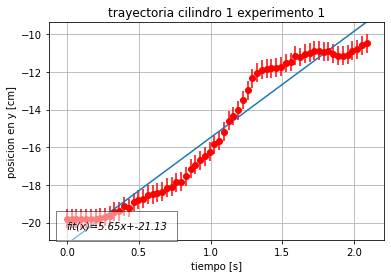

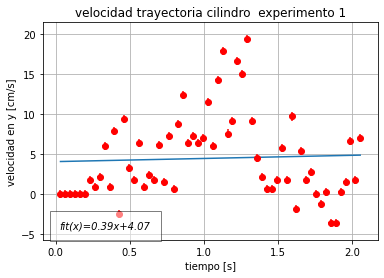

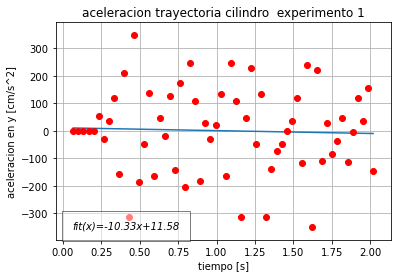

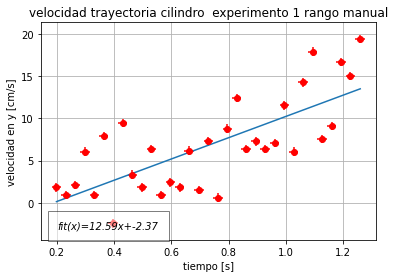

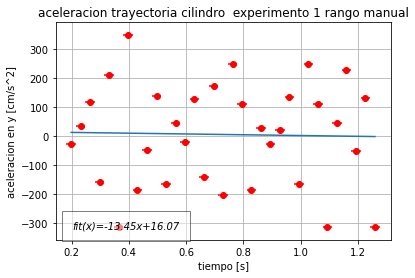

In [20]:
# cilindro ex2 eje y
xes=[0.000,0.033,0.066,0.099,0.132,0.166,0.199,0.232,0.265,0.298,0.331,0.364,0.397,0.430,0.464,0.497,0.530,0.563,0.596,0.629,0.662,0.696,0.729,0.762,0.795,0.828,0.861,0.894,0.927,0.960,0.994,1.027,1.060,1.093,1.126,1.159,1.192,1.225,1.259,1.292,1.325,1.358,1.391,1.424,1.457,1.490,1.523,1.557,1.590,1.623,1.656,1.689,1.722,1.755,1.788,1.821,1.855,1.888,1.921,1.954,1.987,2.020,2.053,2.086]
# tiempo

yes=[-19.79,-19.79,-19.79,-19.79,-19.79,-19.79,-19.79,-19.73,-19.70,-19.63,-19.43,-19.40,-19.14,-19.22,-18.90,-18.79,-18.73,-18.52,-18.49,-18.41,-18.35,-18.14,-18.09,-17.85,-17.83,-17.54,-17.13,-16.92,-16.68,-16.47,-16.23,-15.85,-15.65,-15.18,-14.59,-14.34,-14.04,-13.49,-12.98,-12.34,-12.04,-11.89,-11.82,-11.80,-11.78,-11.72,-11.53,-11.47,-11.15,-11.21,-11.03,-10.97,-10.88,-10.88,-10.92,-10.91,-11.03,-11.15,-11.14,-11.09,-10.87,-10.81,-10.58,-10.49]
# posicion en y
dt = xes[1]-xes[2]
#Minimo tiempo entre fotos (entre tres..)
incertx=dt/2 
# Minima medida de espacio entre 2 (.5 cm)
incerty = 0.5 


graficaDatos(xes, yes, incertx, incerty,"tiempo [s]", "posicion en y [cm]", "trayectoria cilindro 1 experimento 1")

vcy1=velocity(xes,yes)
acy1= velocity(xes[1:len(xes)-1],vcy1)
graficaDatos(xes[1:len(xes)-1], vcy1, incertx, incerty,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria cilindro  experimento 1")
graficaDatos(xes[2:len(xes)-2], acy1, incertx, incerty,"tiempo [s]", "aceleracion en y [cm/s^2]", "aceleracion trayectoria cilindro  experimento 1")

## begin manual fit
## zoom in for better fit

loindx=6 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-25 ## must be smaller than len(xes)


graficaDatos(xes[loindx:hindx], vcy1[loindx:hindx], incertx, incerty,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria cilindro  experimento 1 rango manual")
graficaDatos(xes[loindx:hindx], acy1[loindx:hindx], incertx, incerty,"tiempo [s]", "aceleracion en y [cm/s^2]", "aceleracion trayectoria cilindro  experimento 1 rango manual")
## end manual fit

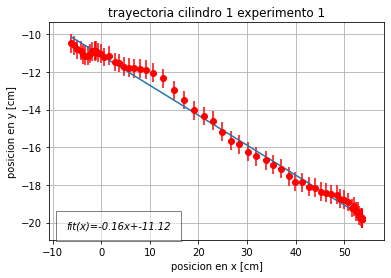

In [21]:
# cilindro ex2 trayectoria
xes=[53.74,53.74,53.74,53.71,53.71,53.70,53.62,53.63,53.43,53.10,52.81,52.47,52.04,51.54,50.83,50.04,49.22,48.48,47.34,46.25,45.24,44.02,42.74,41.32,39.98,38.61,36.98,35.35,33.89,31.91,30.27,28.39,26.67,24.91,22.94,21.18,19.03,17.10,14.95,12.77,10.70,9.199,7.951,6.745,5.797,4.764,3.691,2.787,1.673,0.637,-9.159E-2,-0.737,-1.037,-1.209,-1.382,-1.813,-2.246,-2.808,-3.325,-3.798,-4.268,-5.042,-5.641,-6.200]
# posicion x

yes=[-19.79,-19.79,-19.79,-19.79,-19.79,-19.79,-19.79,-19.73,-19.70,-19.63,-19.43,-19.40,-19.14,-19.22,-18.90,-18.79,-18.73,-18.52,-18.49,-18.41,-18.35,-18.14,-18.09,-17.85,-17.83,-17.54,-17.13,-16.92,-16.68,-16.47,-16.23,-15.85,-15.65,-15.18,-14.59,-14.34,-14.04,-13.49,-12.98,-12.34,-12.04,-11.89,-11.82,-11.80,-11.78,-11.72,-11.53,-11.47,-11.15,-11.21,-11.03,-10.97,-10.88,-10.88,-10.92,-10.91,-11.03,-11.15,-11.14,-11.09,-10.87,-10.81,-10.58,-10.49]
# posicion en y

#Minimo tiempo entre fotos (entre tres..)
incertx=0.5
# Minima medida de espacio entre 2 (.5 cm)
incerty = 0.5 


graficaDatos(xes, yes, incertx, incerty,"posicion en x [cm]", "posicion en y [cm]", "trayectoria cilindro 1 experimento 1")
cx1=xes
cy1=yes

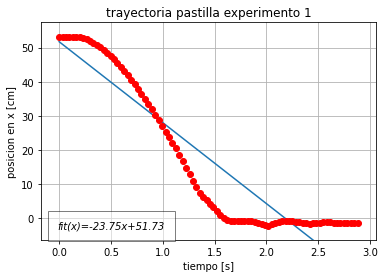

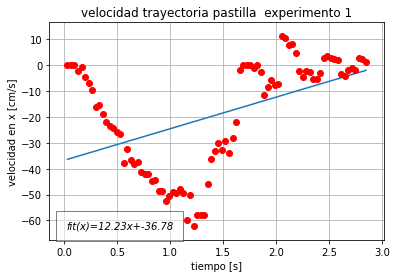

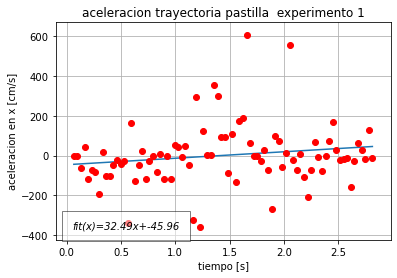

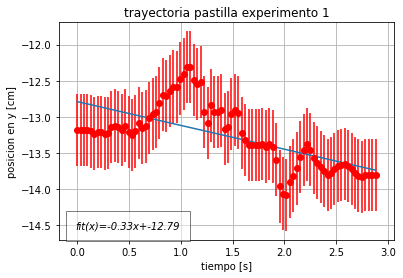

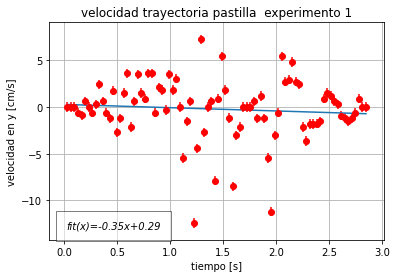

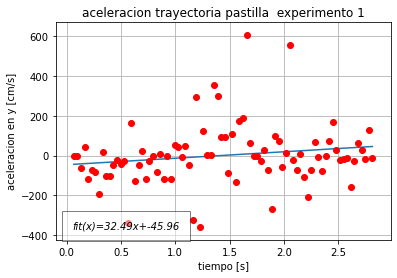

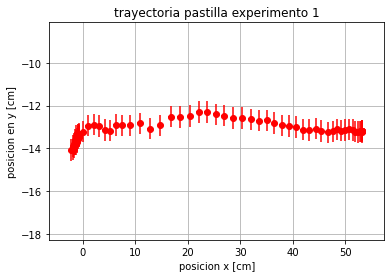

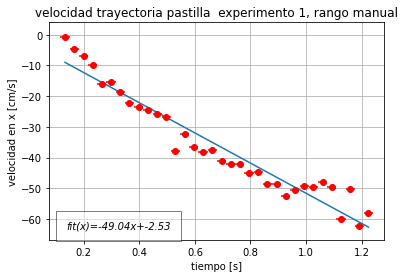

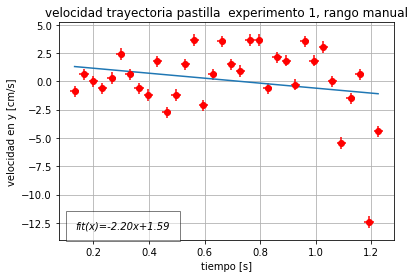

16.49545082865672


In [22]:
import csv

datt=[];
with open('./MRUA/ex2/ex2pastilla', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5

vpx1=velocity(tiempop,xes)
apx1 = velocity(tiempop[1:len(tiempop)-1], vpx1)

graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria pastilla experimento 1")
graficaDatos(tiempop[1:len(tiempop)-1], vpx1, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria pastilla  experimento 1")
graficaDatos(tiempop[2:len(tiempop)-2], apx1, dt, dx,"tiempo [s]", "aceleracion en x [cm/s]", "aceleracion trayectoria pastilla  experimento 1")


vpy1 = velocity(tiempop,yes)
apy1 = velocity(tiempop[1:len(tiempop)-1], vpy1)


graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria pastilla experimento 1")
graficaDatos(tiempop[1:len(tiempop)-1], vpy1, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria pastilla  experimento 1")
graficaDatos(tiempop[2:len(tiempop)-2], apx1, dt, dx,"tiempo [s]", "aceleracion en y [cm/s]", "aceleracion trayectoria pastilla  experimento 1")


graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria pastilla experimento 1")
px1=xes
py1=yes

## begin manual fit
## zoom in for better fit

loindx=4 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-50 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vpx1[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria pastilla  experimento 1, rango manual")
graficaDatos(tiempop[loindx:hindx], vpy1[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria pastilla  experimento 1, rango manual")

## end manual fit
print(stdvec(vpx1[loindx:hindx]))

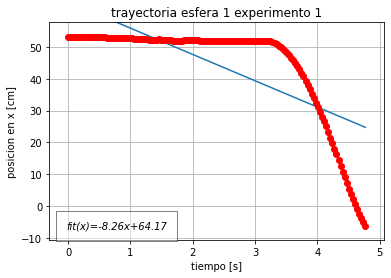

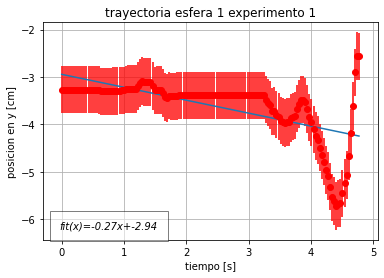

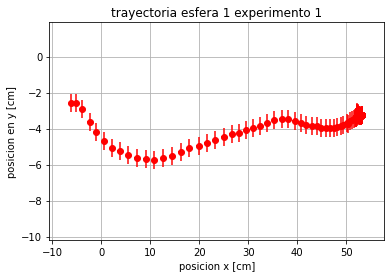

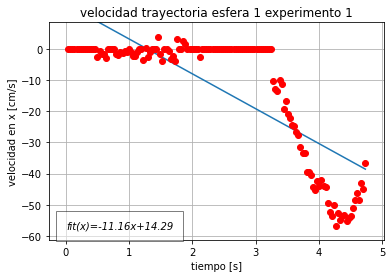

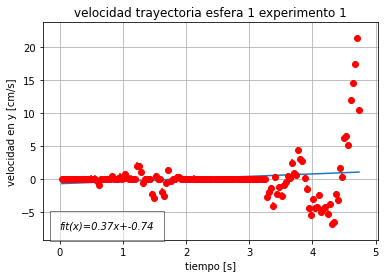

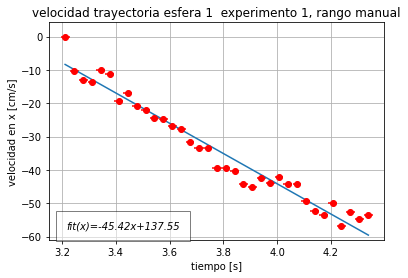

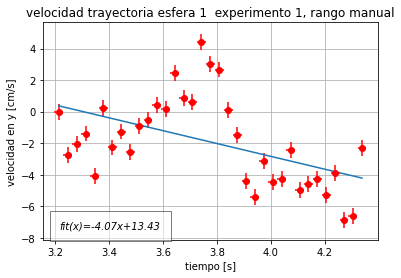

15.521415670363627


In [23]:
import csv

datt=[];
with open('./MRUA/ex2/ex2s1', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 1 experimento 1")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 1 experimento 1")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 1 experimento 1")
s1x1=xes
s1y1=yes

vs1x1=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs1x1, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 1 experimento 1")

vs1y1=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs1y1, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 1 experimento 1")

## begin manual fit
## zoom in for better fit

loindx=97 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-13 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs1x1[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 1  experimento 1, rango manual")
graficaDatos(tiempop[loindx:hindx], vs1y1[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 1  experimento 1, rango manual")

## end manual fit
print(stdvec(vs1x1[loindx:hindx]))

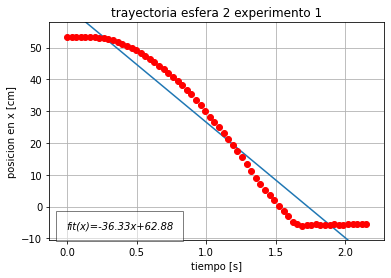

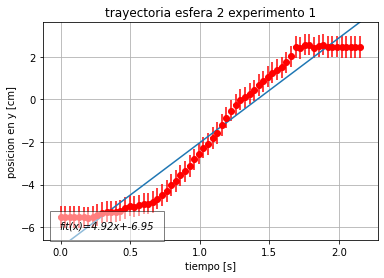

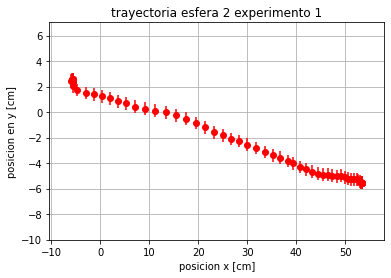

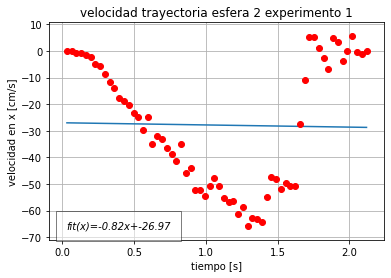

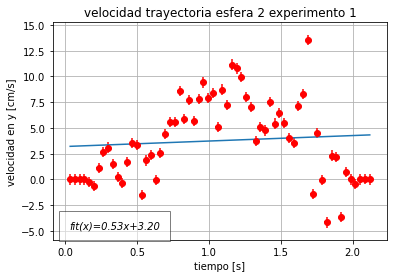

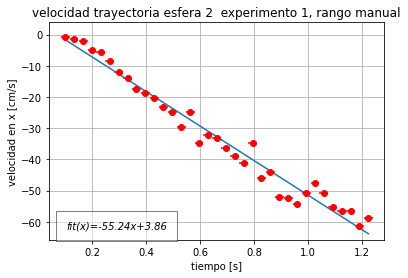

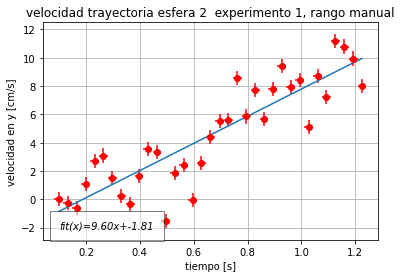

18.746879745441085


In [24]:
import csv

datt=[];
with open('./MRUA/ex2/ex2s2', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 2 experimento 1")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 2 experimento 1")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 2 experimento 1")
 
s2x1=xes
s2y1=yes

vs2x1=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs2x1, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 2 experimento 1")

vs2y1=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs2y1, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 2 experimento 1")


## begin manual fit
## zoom in for better fit

loindx=3 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-28 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs2x1[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 2  experimento 1, rango manual")
graficaDatos(tiempop[loindx:hindx], vs2y1[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 2  experimento 1, rango manual")

## end manual fit
print(stdvec(vs2x1[loindx:hindx]))

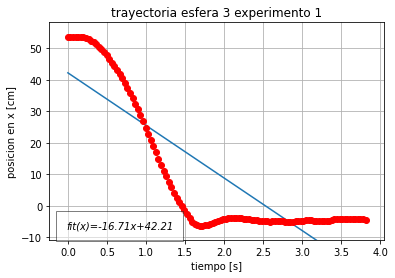

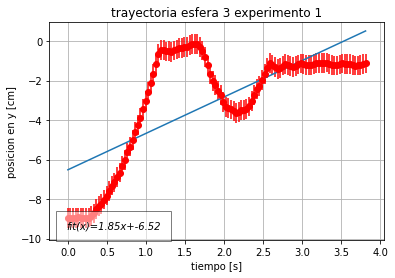

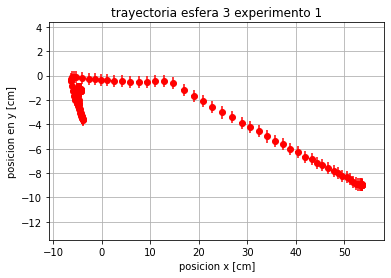

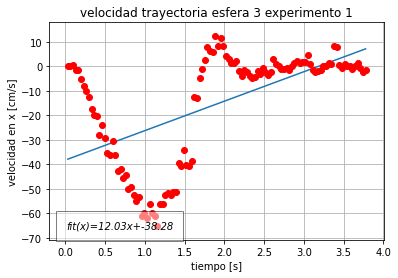

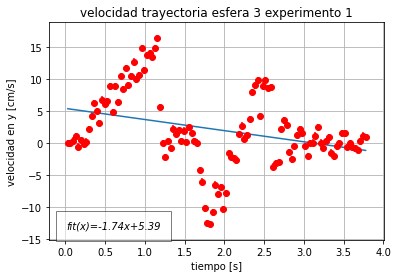

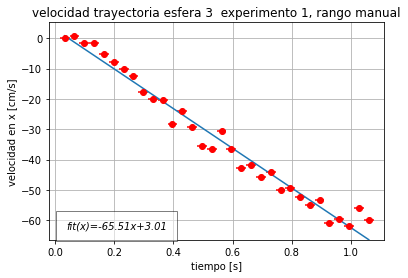

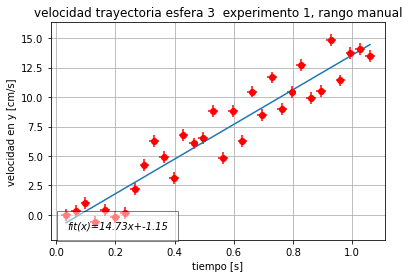

20.285006407737555


In [25]:
import csv

datt=[];
with open('./MRUA/ex2/ex2s3', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 3 experimento 1")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 3 experimento 1")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 3 experimento 1")
 
s3x1=xes
s3y1=yes

vs3x1=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs3x1, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 3 experimento 1")

vs3y1=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs3y1, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 3 experimento 1")


## begin manual fit
## zoom in for better fit

loindx=1 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-83 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs3x1[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 3  experimento 1, rango manual")
graficaDatos(tiempop[loindx:hindx], vs3y1[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 3  experimento 1, rango manual")

## end manual fit
print(stdvec(vs3x1[loindx:hindx]))

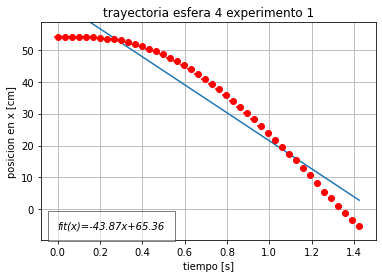

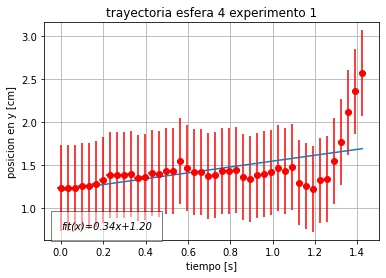

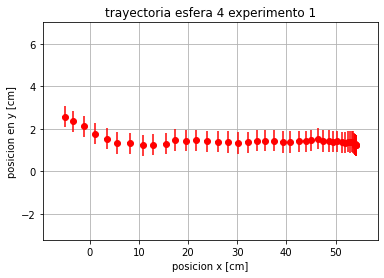

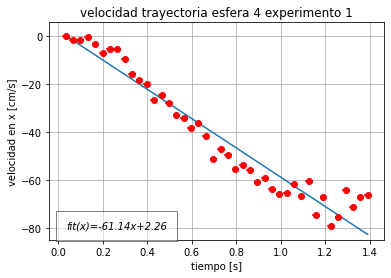

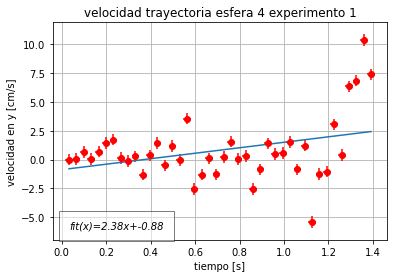

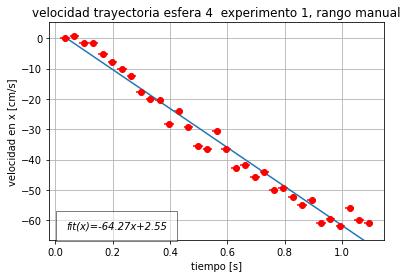

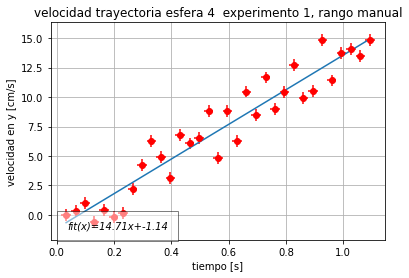

22.677540905397006


In [26]:
import csv

datt=[];
with open('./MRUA/ex2/ex2s4', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 4 experimento 1")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 4 experimento 1")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 4 experimento 1")

s4x1=xes
s4y1=yes

vs4x1=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs4x1, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 4 experimento 1")

vs4y1=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs4y1, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 4 experimento 1")

## begin manual fit
## zoom in for better fit

loindx=1 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-10 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs3x1[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 4  experimento 1, rango manual")
graficaDatos(tiempop[loindx:hindx], vs3y1[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 4  experimento 1, rango manual")

## end manual fit
print(stdvec(vs4x1[loindx:hindx]))

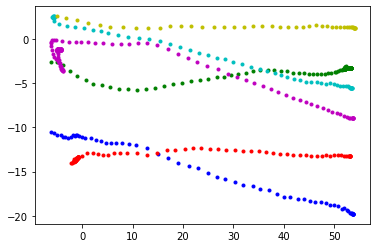

In [27]:
# no vuelvas a correr esta linea, tienes que ir coleccionando cada valor cx1, etc.. por cada experimento, osea correr cada linea otra vez
plt.plot(cx1,cy1,'b.',px1,py1,'r.',s1x1,s1y1,'g.',s2x1,s2y1,'c.',s3x1,s3y1,'m.',s4x1,s4y1,'y.')


## resultados experimento 2 (ex3)

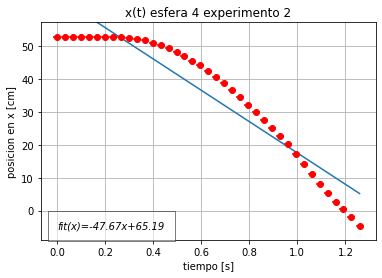

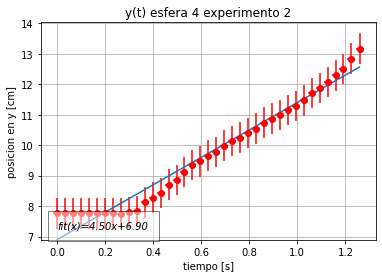

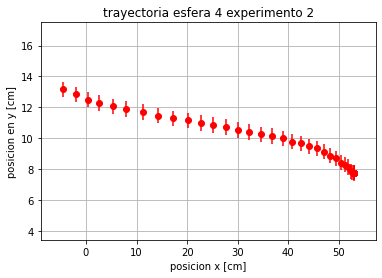

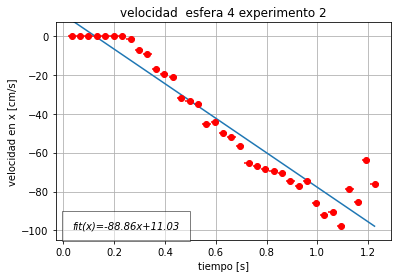

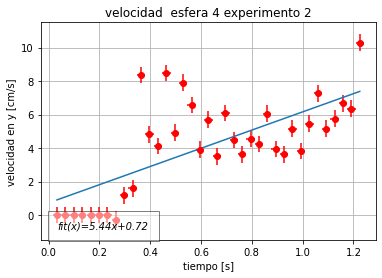

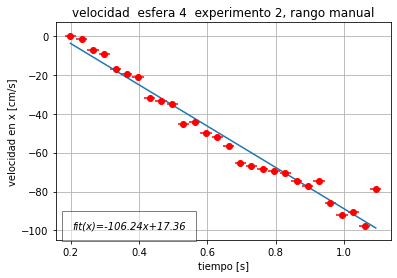

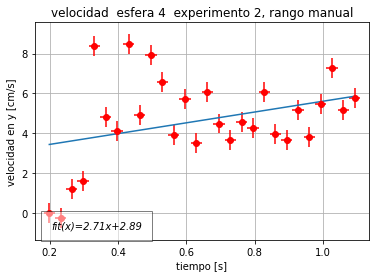

In [28]:
import csv

datt=[];
with open('./MRUA/ex3/ex3s4', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "x(t) esfera 4 experimento 2")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "y(t) esfera 4 experimento 2")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 4 experimento 2")

s4x2=xes
s4y2=yes

vs4x2=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs4x2, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad  esfera 4 experimento 2")

vs4y2=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs4y2, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad  esfera 4 experimento 2")

## begin manual fit
## zoom in for better fit

loindx=6 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-5 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs4x2[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad  esfera 4  experimento 2, rango manual")
graficaDatos(tiempop[loindx:hindx], vs4y2[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad  esfera 4  experimento 2, rango manual")

## end manual fit

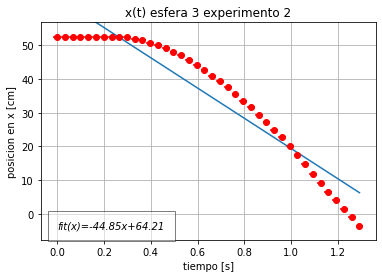

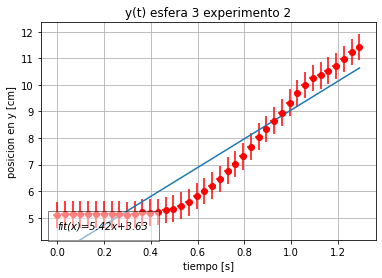

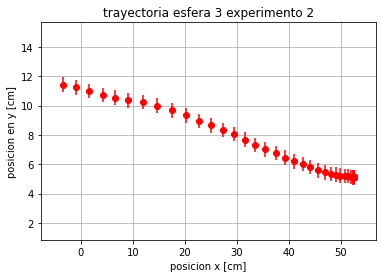

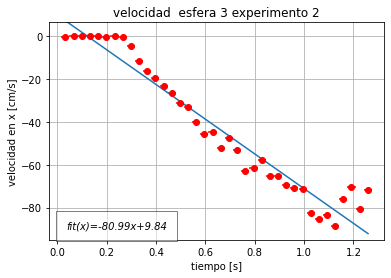

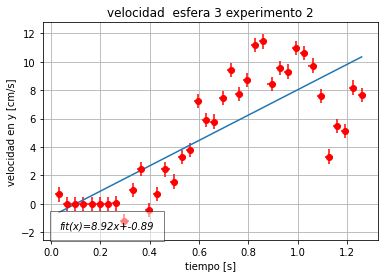

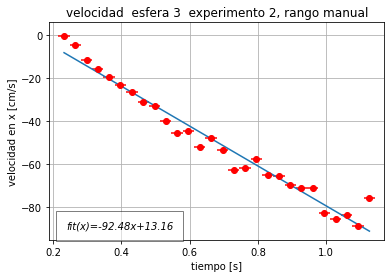

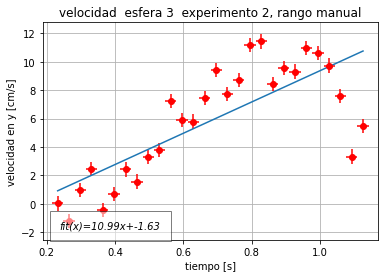

In [29]:
import csv

datt=[];
with open('./MRUA/ex3/ex3s3', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "x(t) esfera 3 experimento 2")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "y(t) esfera 3 experimento 2")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 3 experimento 2")
 
s3x2=xes
s3y2=yes

vs3x2=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs3x2, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad  esfera 3 experimento 2")

vs3y2=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs3y2, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad  esfera 3 experimento 2")

## begin manual fit
## zoom in for better fit

loindx=7 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-5 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs3x2[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad  esfera 3  experimento 2, rango manual")
graficaDatos(tiempop[loindx:hindx], vs3y2[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad  esfera 3  experimento 2, rango manual")

## end manual fit

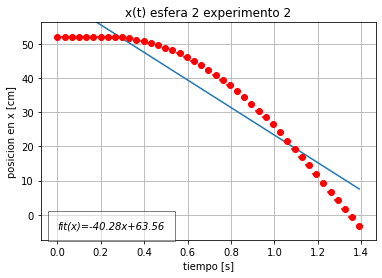

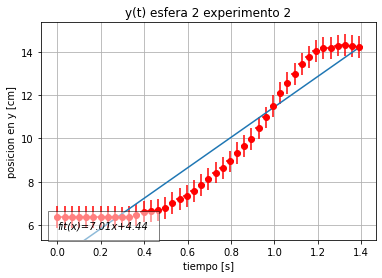

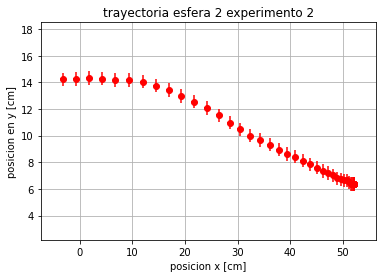

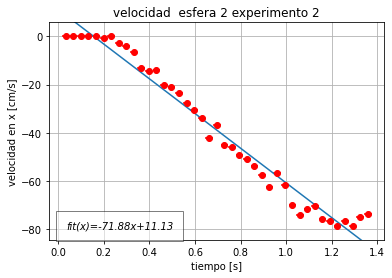

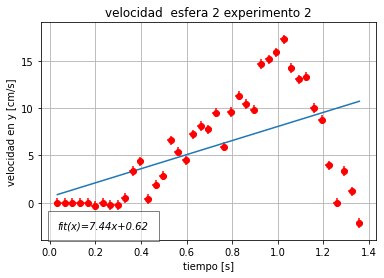

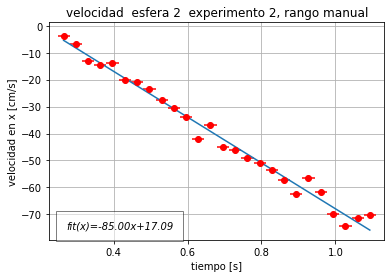

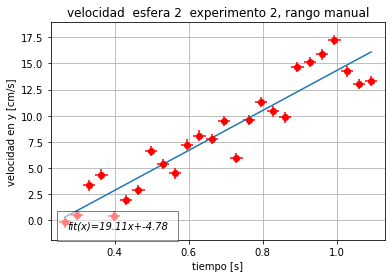

In [30]:
import csv

datt=[];
with open('./MRUA/ex3/ex3s2', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "x(t) esfera 2 experimento 2")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "y(t) esfera 2 experimento 2")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 2 experimento 2")
 
s2x2=xes
s2y2=yes
vs2x2=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs2x2, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad  esfera 2 experimento 2")

vs2y2=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs2y2, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad  esfera 2 experimento 2")

## begin manual fit
## zoom in for better fit

loindx=8 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-9 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs2x2[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad  esfera 2  experimento 2, rango manual")
graficaDatos(tiempop[loindx:hindx], vs2y2[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad  esfera 2  experimento 2, rango manual")

## end manual fit

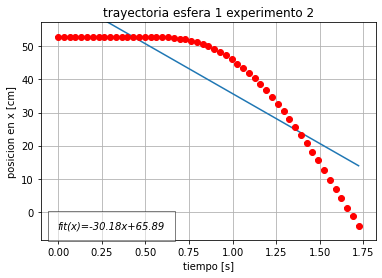

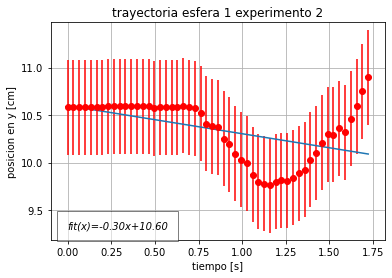

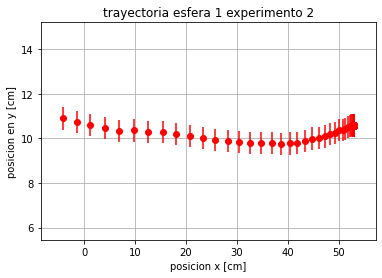

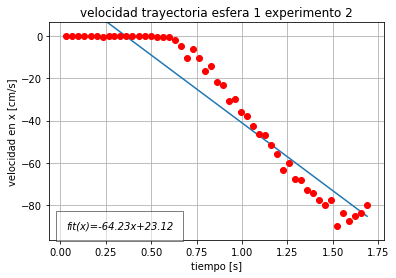

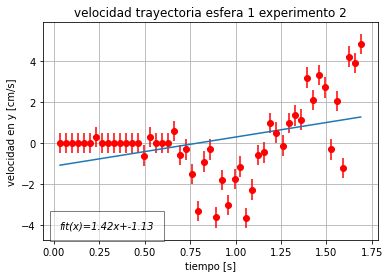

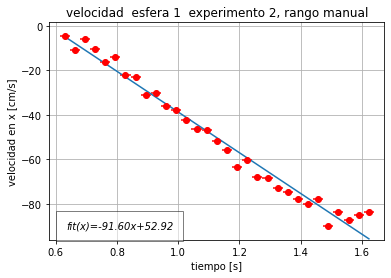

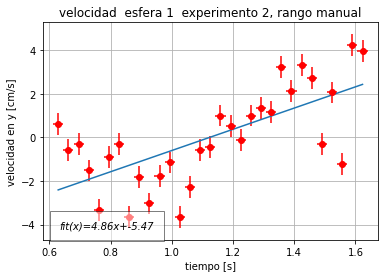

In [31]:
import csv

datt=[];
with open('./MRUA/ex3/ex3s1', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 1 experimento 2")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 1 experimento 2")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 1 experimento 2")
s1x2=xes
s1y2=yes

vs1x2=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs1x2, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 1 experimento 2")

vs1y2=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs1y2, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 1 experimento 2")

## begin manual fit
## zoom in for better fit

loindx=19 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-3 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs1x2[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad  esfera 1  experimento 2, rango manual")
graficaDatos(tiempop[loindx:hindx], vs1y2[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad  esfera 1  experimento 2, rango manual")

## end manual fit

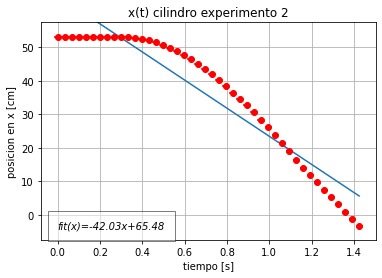

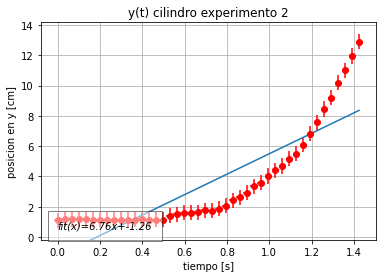

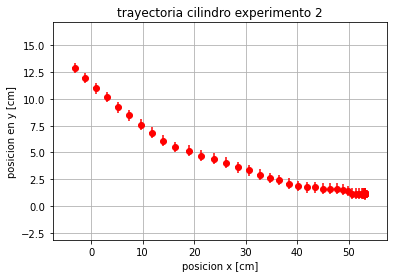

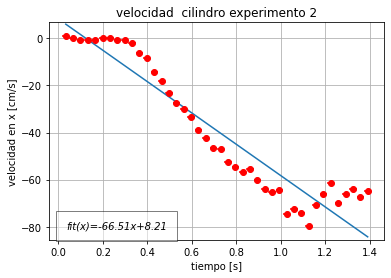

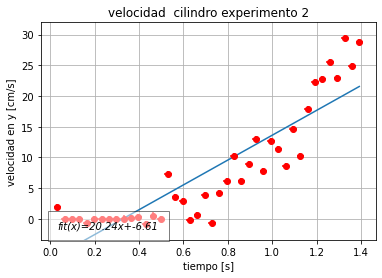

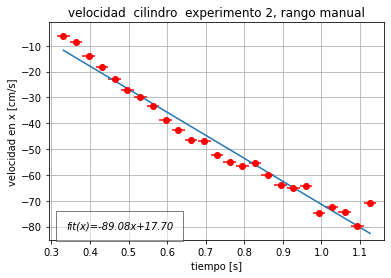

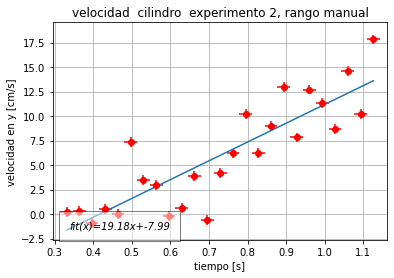

In [32]:
import csv

datt=[];
with open('./MRUA/ex3/ex3cilindro', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "x(t) cilindro experimento 2")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "y(t) cilindro experimento 2")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria cilindro experimento 2")
 
cx2=xes
cy2=yes

vcx2=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vcx2, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad  cilindro experimento 2")

vcy2=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vcy2, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad  cilindro experimento 2")

## begin manual fit
## zoom in for better fit

loindx=10 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-9 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vcx2[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad  cilindro  experimento 2, rango manual")
graficaDatos(tiempop[loindx:hindx], vcy2[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad  cilindro  experimento 2, rango manual")

## end manual fit

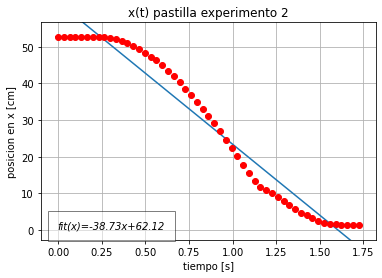

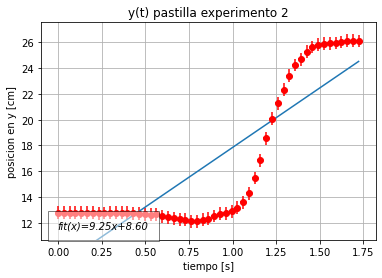

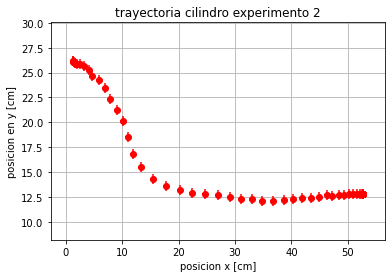

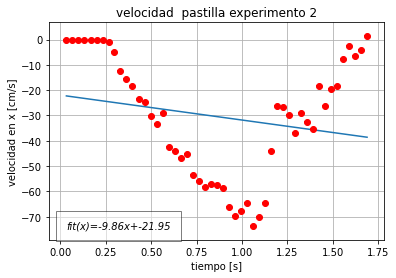

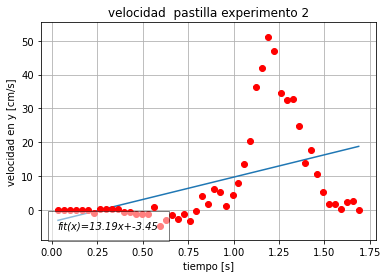

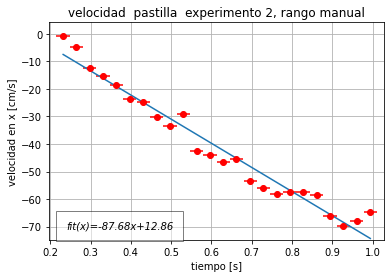

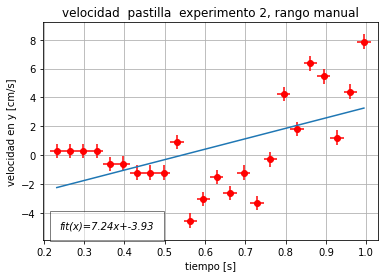

In [33]:
import csv

datt=[];
with open('./MRUA/ex3/ex3pastilla', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "x(t) pastilla experimento 2")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "y(t) pastilla experimento 2")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria cilindro experimento 2")
 
px2=xes
py2=yes

vpx2=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vpx2, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad  pastilla experimento 2")

vpy2=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vpy2, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad  pastilla experimento 2")

## begin manual fit
## zoom in for better fit

loindx=7 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-22 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vpx2[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad  pastilla  experimento 2, rango manual")
graficaDatos(tiempop[loindx:hindx], vpy2[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad  pastilla  experimento 2, rango manual")

## end manual fit

# trayectorias experimento 2

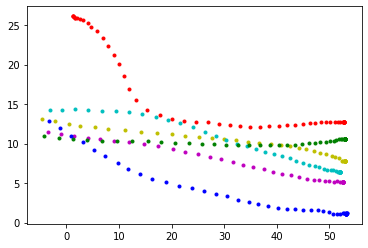

In [34]:
#plt.plot(cx1,cy1,'b.',px1,py1,'r.',s1x1,s1y1,'g.',s2x1,s2y1,'c.',s3x1,s3y1,'m.',s4x1,s4y1,'y.')
plt.plot(s4x2,s4y2,'y.',s3x2,s3y2, 'm.',s2x2,s2y2,'c.',s1x2,s1y2,'g.',cx2,cy2,'b.',px2,py2,'r.')


## resultados experimento 3

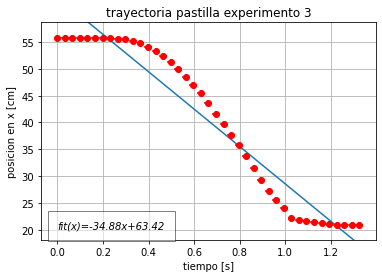

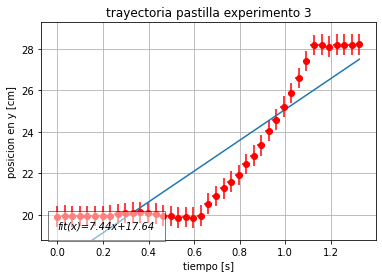

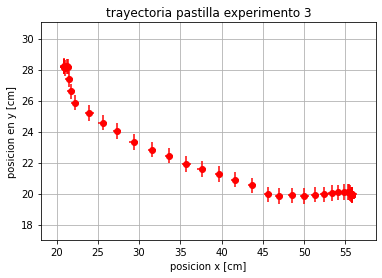

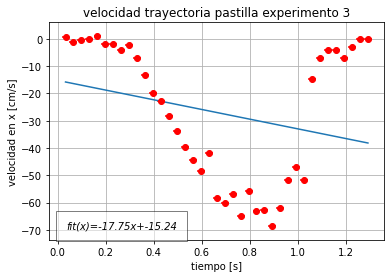

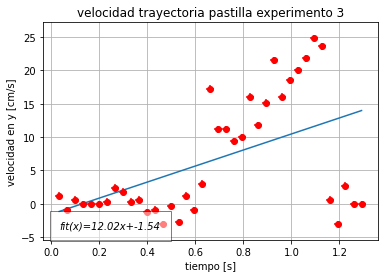

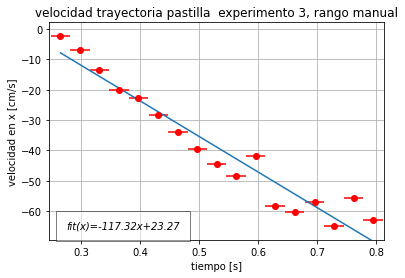

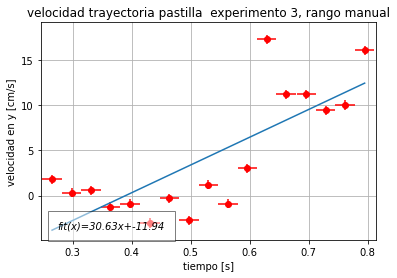

In [35]:
import csv

datt=[];
with open('./MRUA/ex4/ex4pastilla', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria pastilla experimento 3")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria pastilla experimento 3")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria pastilla experimento 3")
 
px3=xes
py3=yes

vpx3=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vpx3, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria pastilla experimento 3")

vpy3=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vpy3, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria pastilla experimento 3")


## begin manual fit
## zoom in for better fit

loindx=8 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-16 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vpx3[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria pastilla  experimento 3, rango manual")
graficaDatos(tiempop[loindx:hindx], vpy3[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria pastilla  experimento 3, rango manual")

## end manual fit

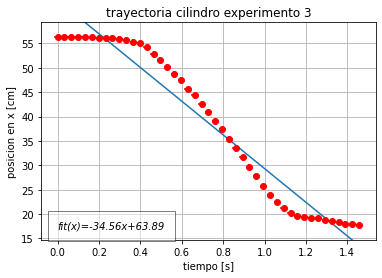

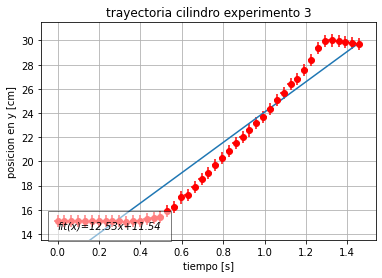

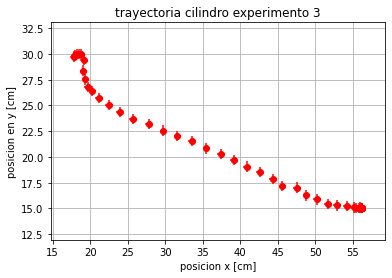

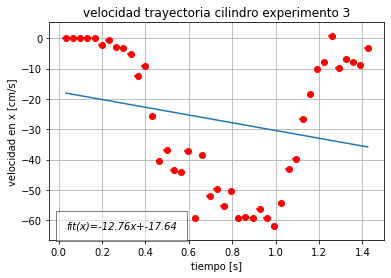

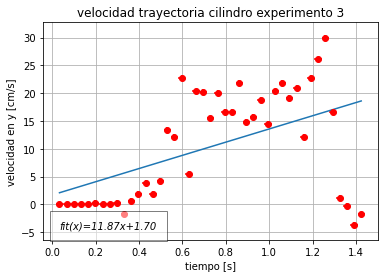

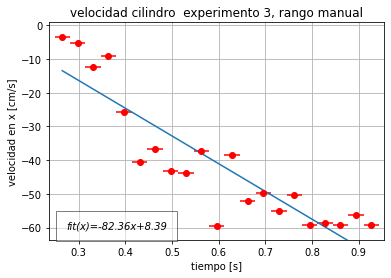

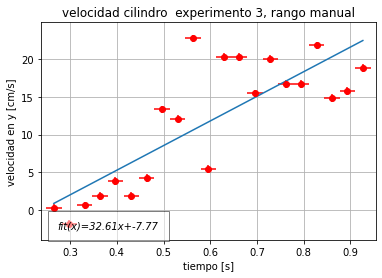

In [36]:
import csv

datt=[];
with open('./MRUA/ex4/ex4cilindro', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria cilindro experimento 3")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria cilindro experimento 3")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria cilindro experimento 3")
 
cx3=xes
cy3=yes

vcx3=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vcx3, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria cilindro experimento 3")

vcy3=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vcy3, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria cilindro experimento 3")


## begin manual fit
## zoom in for better fit

loindx=8 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-16 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vcx3[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad cilindro  experimento 3, rango manual")
graficaDatos(tiempop[loindx:hindx], vcy3[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad cilindro  experimento 3, rango manual")

## end manual fit

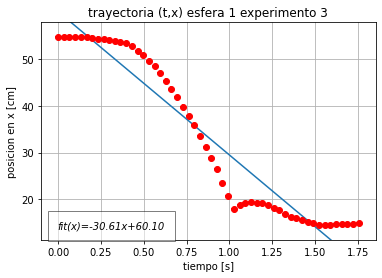

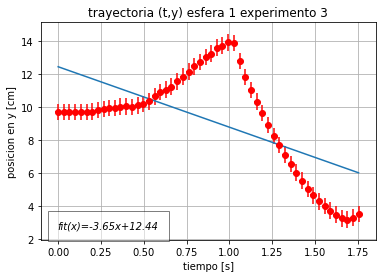

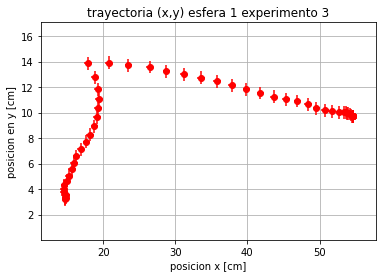

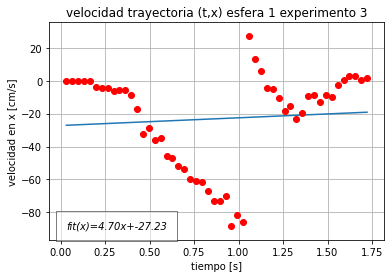

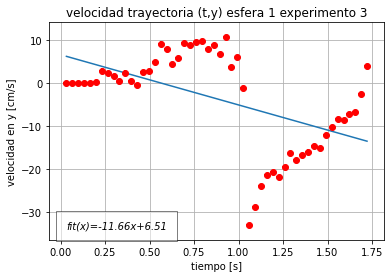

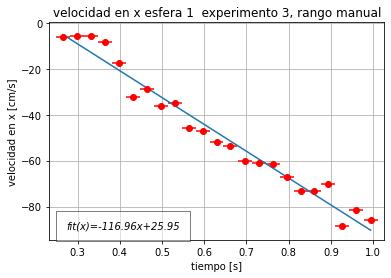

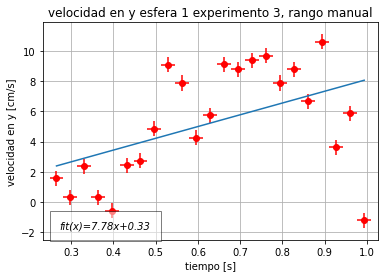

In [37]:
import csv

datt=[];
with open('./MRUA/ex4/ex4s1', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria (t,x) esfera 1 experimento 3")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria (t,y) esfera 1 experimento 3")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria (x,y) esfera 1 experimento 3")
 
s1x3=xes
s1y3=yes

vs1x3=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs1x3, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria (t,x) esfera 1 experimento 3")

vs1y3=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs1y3, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria (t,y) esfera 1 experimento 3")

## begin manual fit
## zoom in for better fit

loindx=8 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-23 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs1x3[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad en x esfera 1  experimento 3, rango manual")
graficaDatos(tiempop[loindx:hindx], vs1y3[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad en y esfera 1 experimento 3, rango manual")

## end manual fit

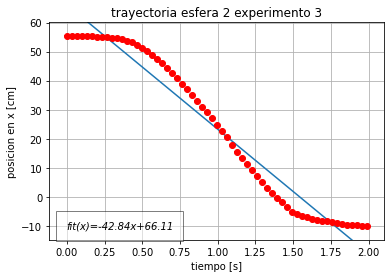

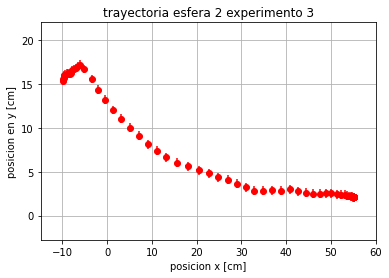

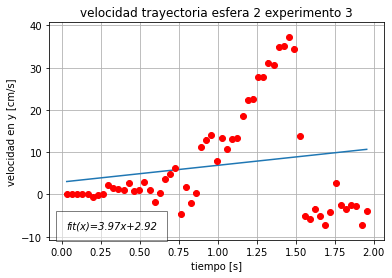

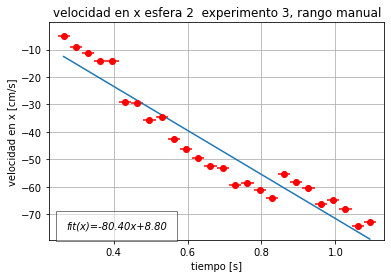

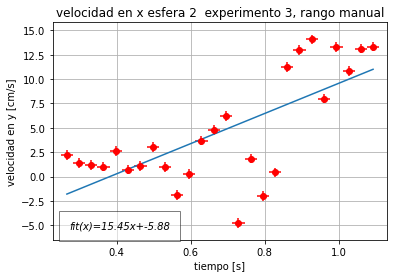

In [38]:
import csv

datt=[];
with open('./MRUA/ex4/ex4s2', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 2 experimento 3")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 2 experimento 3")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 2 experimento 3")
 
s2x3=xes
s2y3=yes

vs2x3=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs2x3, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 2 experimento 3")

vs2y3=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs2y3, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 2 experimento 3")

## begin manual fit
## zoom in for better fit

loindx=8 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-27 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs2x3[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad en x esfera 2  experimento 3, rango manual")
graficaDatos(tiempop[loindx:hindx], vs2y3[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad en x esfera 2  experimento 3, rango manual")

## end manual fit

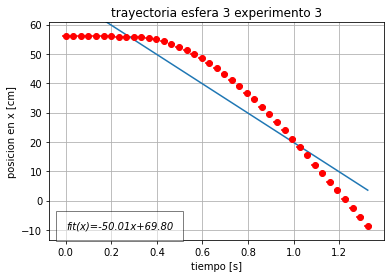

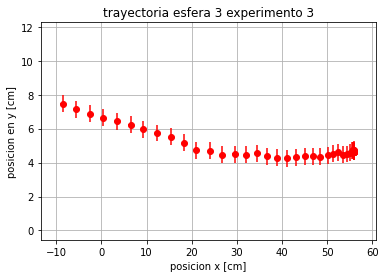

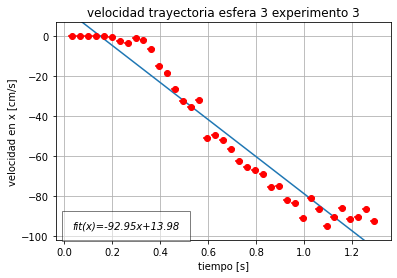

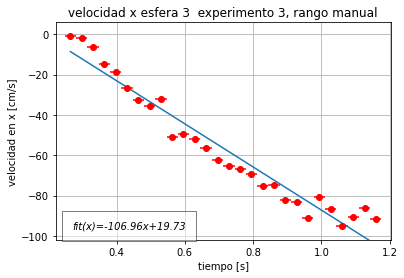

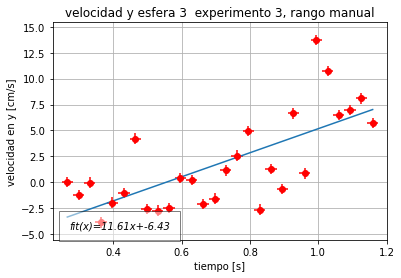

In [39]:
import csv

datt=[];
with open('./MRUA/ex4/ex4s3', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 3 experimento 3")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 3 experimento 3")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 3 experimento 3")
 
s3x3=xes
s3y3=yes
vs3x3=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs3x3, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 3 experimento 3")

vs3y3=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs3y3, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 3 experimento 3")

## begin manual fit
## zoom in for better fit

loindx=8 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-5 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs3x3[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x esfera 3  experimento 3, rango manual")
graficaDatos(tiempop[loindx:hindx], vs3y3[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y esfera 3  experimento 3, rango manual")

## end manual fit

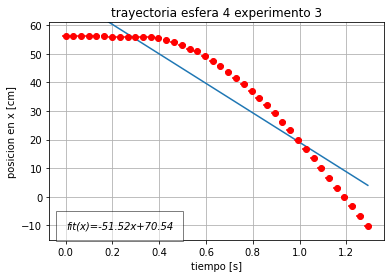

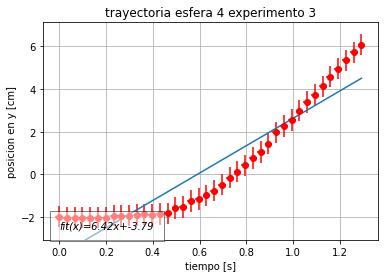

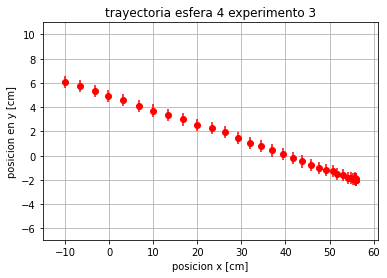

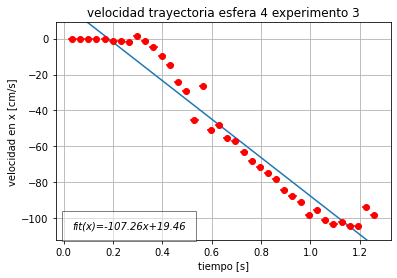

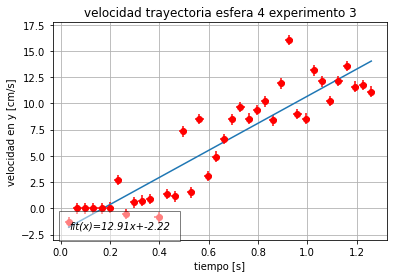

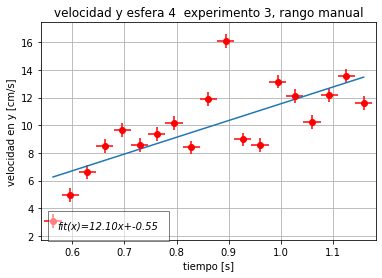

In [40]:
import csv

datt=[];
with open('./MRUA/ex4/ex4s4', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 4 experimento 3")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 4 experimento 3")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 4 experimento 3")
 
s4x3=xes
s4y3=yes

vs4x3=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs4x3, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 4 experimento 3")

vs4y3=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs4y3, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 4 experimento 3")

## begin manual fit
## zoom in for better fit

loindx=17 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-4 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs4x3[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x esfera 4  experimento 3, rango manual")
graficaDatos(tiempop[loindx:hindx], vs4y3[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y esfera 4  experimento 3, rango manual")

## end manual fit

# resultado Experimento 3

In [41]:
#plt.plot(cx1,cy1,'b.',px1,py1,'r.',s1x1,s1y1,'g.',s2x1,s2y1,'c.',s3x1,s3y1,'m.',s4x1,s4y1,'y.')
plt.plot(px3,py3,'r.',cx3,cy3,'b.',s1x3,s1y3,'g.',s2x3,s2y3,'c.',s3x3,s3y3,'m.',s4x3,s4y3,'y.')


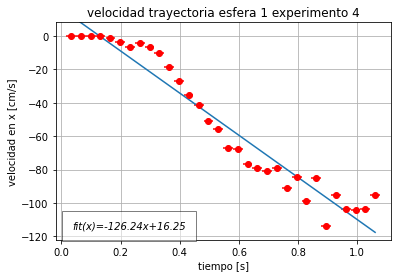

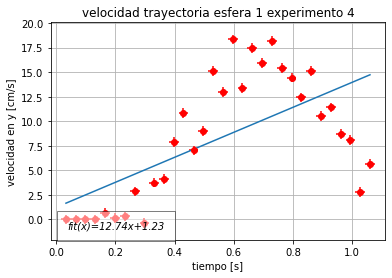

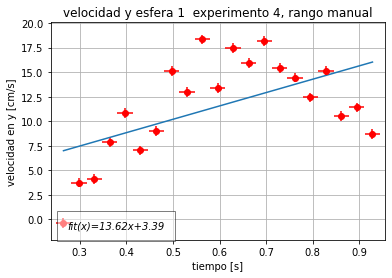

In [42]:
import csv

datt=[];
with open('./MRUA/ex5/ex5s1', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 1 experimento 4")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 1 experimento 4")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 1 experimento 4")
 
s1x4=xes
s1y4=yes
vs1x4=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs1x4, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 1 experimento 4")

vs1y4=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs1y4, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 1 experimento 4")

## begin manual fit
## zoom in for better fit

loindx=8 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-5 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs1x4[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x esfera 1  experimento 4, rango manual")
graficaDatos(tiempop[loindx:hindx], vs1y4[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y esfera 1  experimento 4, rango manual")

## end manual fit

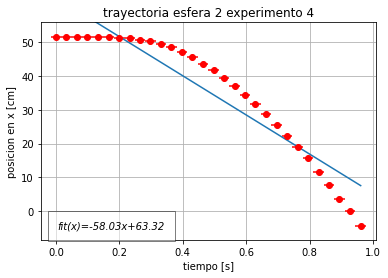

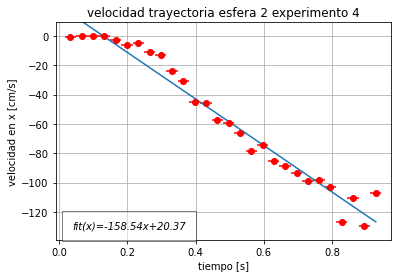

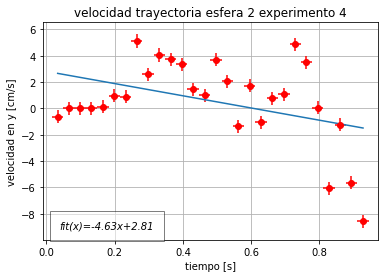

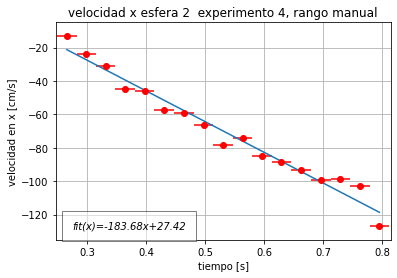

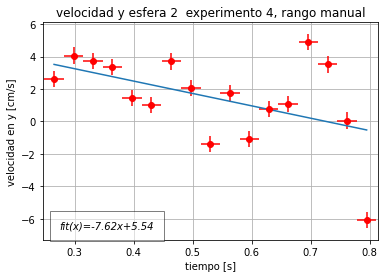

In [43]:
import csv

datt=[];
with open('./MRUA/ex5/ex5s2', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 2 experimento 4")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 2 experimento 4")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 2 experimento 4")
 
s2x4=xes
s2y4=yes

vs2x4=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs2x4, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 2 experimento 4")

vs2y4=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs2y4, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 2 experimento 4")

## begin manual fit
## zoom in for better fit

loindx=8 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-5 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs2x4[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x esfera 2  experimento 4, rango manual")
graficaDatos(tiempop[loindx:hindx], vs2y4[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y esfera 2  experimento 4, rango manual")

## end manual fit

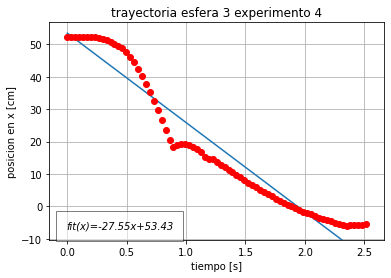

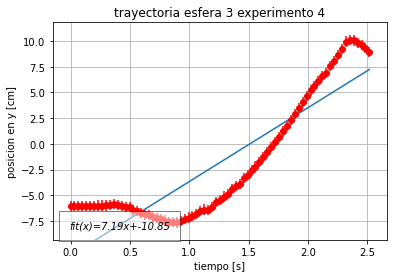

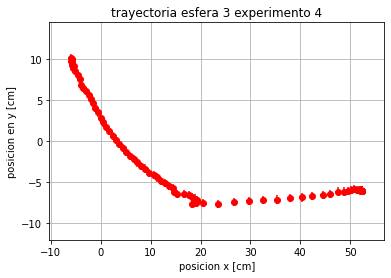

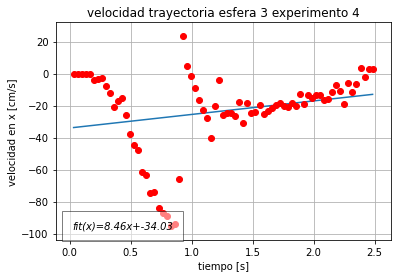

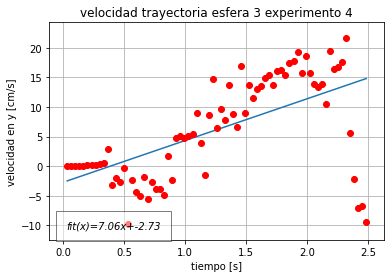

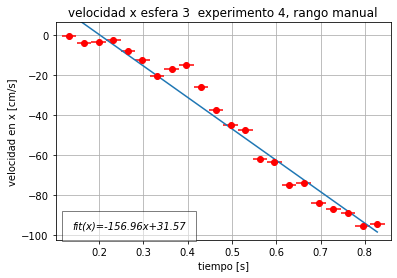

In [44]:
import csv

datt=[];
with open('./MRUA/ex5/ex5s3', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 3 experimento 4")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 3 experimento 4")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 3 experimento 4")
 
s3x4=xes
s3y4=yes

vs3x4=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs3x4, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 3 experimento 4")

vs3y4=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs3y4, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 3 experimento 4")

## begin manual fit
## zoom in for better fit

loindx=4 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-51## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs3x4[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x esfera 3  experimento 4, rango manual")
graficaDatos(tiempop[loindx:hindx], vs3y4[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y esfera 3  experimento 4, rango manual")

## end manual fit

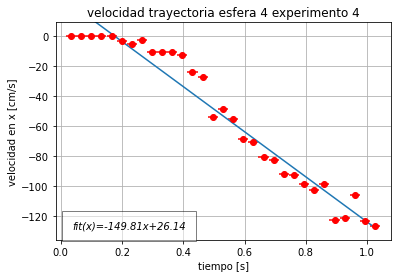

In [45]:
import csv

datt=[];
with open('./MRUA/ex5/ex5s4', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 4 experimento 4")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 4 experimento 4")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 4 experimento 4")
 
s4x4=xes
s4y4=yes

vs4x4=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs4x4, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 4 experimento 4")

vs4y4=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs4y4, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 4 experimento 4")

## begin manual fit
## zoom in for better fit

loindx=8 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-2 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs4x4[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x esfera 4  experimento 4, rango manual")
graficaDatos(tiempop[loindx:hindx], vs4y4[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y esfera 4  experimento 4, rango manual")

## end manual fit

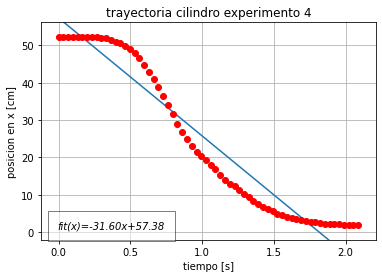

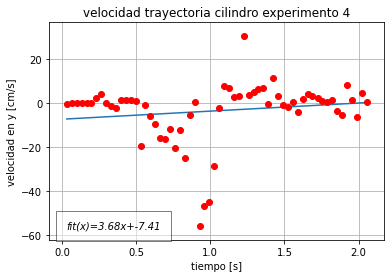

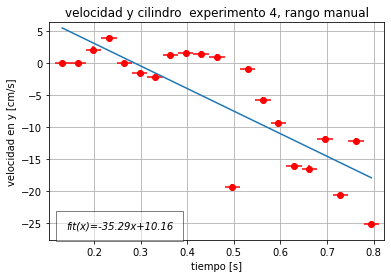

In [46]:
import csv

datt=[];
with open('./MRUA/ex5/ex5cilindro', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria cilindro experimento 4")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria cilindro experimento 4")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria cilindro experimento 4")
 
cx4=xes
cy4=yes

vcx4=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vcx4, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria cilindro experimento 4")

vcy4=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vcy4, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria cilindro experimento 4")

## begin manual fit
## zoom in for better fit

loindx=4 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-39 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vcx4[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x cilindro  experimento 4, rango manual")
graficaDatos(tiempop[loindx:hindx], vcy4[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y cilindro  experimento 4, rango manual")

## end manual fit

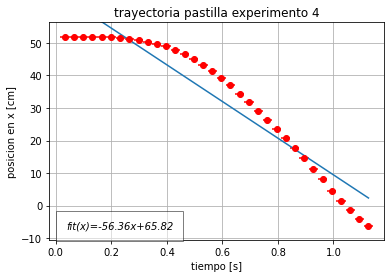

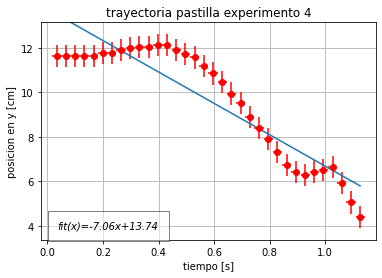

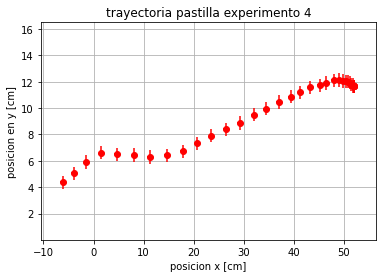

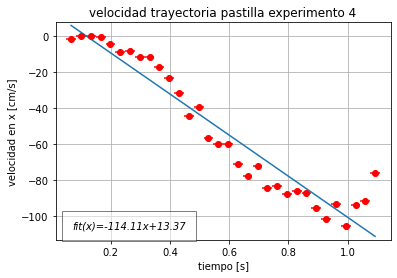

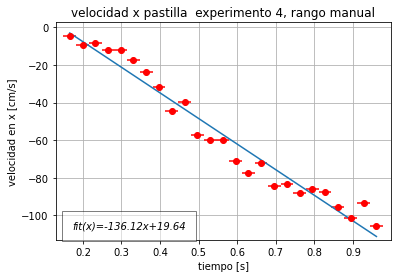

In [47]:
import csv

datt=[];
with open('./MRUA/ex5/ex5pastilla', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria pastilla experimento 4")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria pastilla experimento 4")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria pastilla experimento 4")
 
px4=xes
py4=yes

vpx4=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vpx4, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria pastilla experimento 4")

vpy4=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vpy4, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria pastilla experimento 4")

## begin manual fit
## zoom in for better fit

loindx=4 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-5 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vpx4[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x pastilla  experimento 4, rango manual")
graficaDatos(tiempop[loindx:hindx], vpy4[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y pastilla  experimento 4, rango manual")

## end manual fit

# Resultado Experimento 4

In [48]:
#plt.plot(cx1,cy1,'b.',px1,py1,'r.',s1x1,s1y1,'g.',s2x1,s2y1,'c.',s3x1,s3y1,'m.',s4x1,s4y1,'y.')
plt.plot(px4,py4,'r.',cx4,cy4,'b.',s1x4,s1y4,'g.',s2x4,s2y4,'c.',s3x4,s3y4,'m.',s4x4,s4y4,'y.')


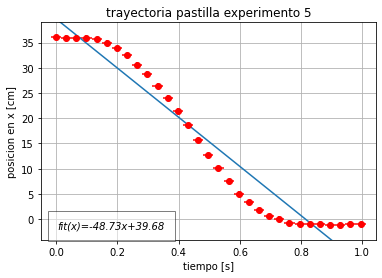

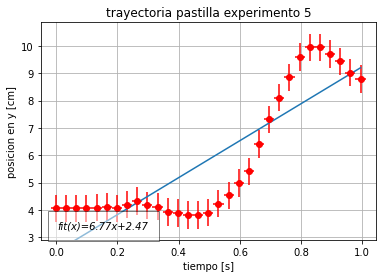

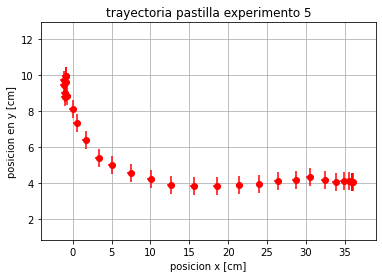

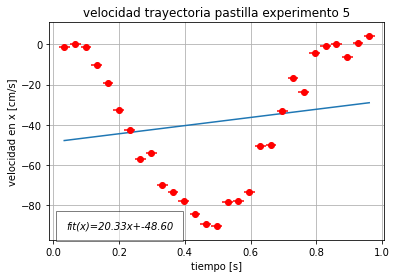

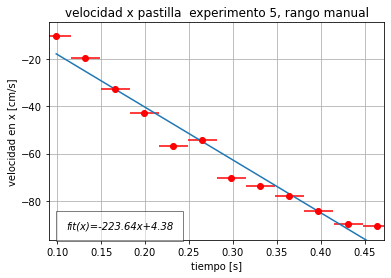

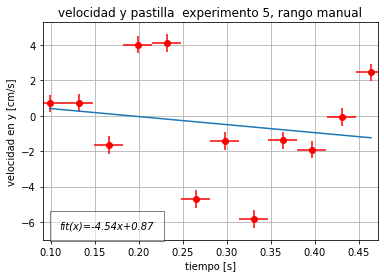

In [49]:
import csv

datt=[];
with open('./MRUA/ex6/ex6pastilla', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria pastilla experimento 5")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria pastilla experimento 5")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria pastilla experimento 5")
 
px5=xes
py5=yes


vpx5=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vpx5, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria pastilla experimento 5")

vpy5=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vpy5, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria pastilla experimento 5")

## begin manual fit
## zoom in for better fit

loindx=3 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-16 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vpx5[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x pastilla  experimento 5, rango manual")
graficaDatos(tiempop[loindx:hindx], vpy5[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y pastilla  experimento 5, rango manual")

## end manual fit

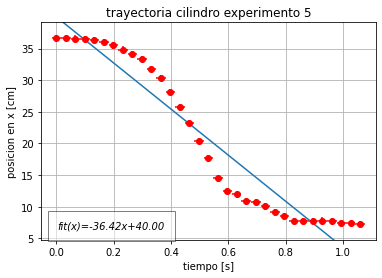

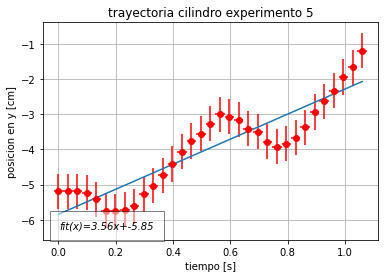

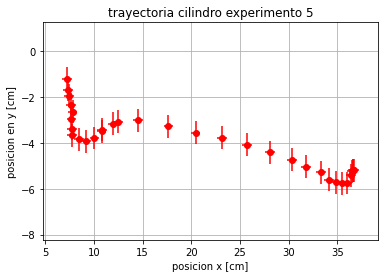

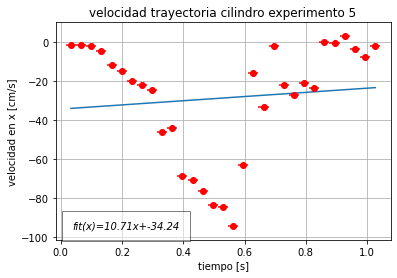

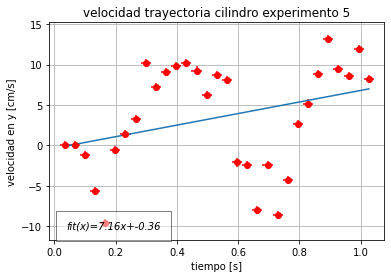

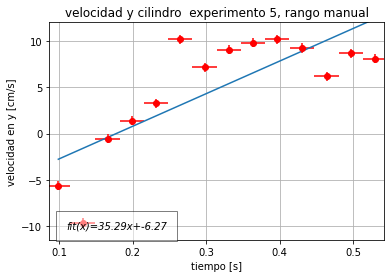

In [74]:
import csv

datt=[];
with open('./MRUA/ex6/ex6cilindro', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria cilindro experimento 5")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria cilindro experimento 5")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria cilindro experimento 5")
 

cx5=xes

vcx5=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vcx5, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria cilindro experimento 5")

vcy5=velocity(tiempop,yes)
vcxi5=veluncert(tiempop,xes,dt,dx)

graficaDatos(tiempop[1:len(tiempop)-1], vcy5, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria cilindro experimento 5")

## begin manual fit
## zoom in for better fit

loindx=3 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-16 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vcxi5[0][loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x cilindro  experimento 5, rango manual")
graficaDatos(tiempop[loindx:hindx], vcy5[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y cilindro  experimento 5, rango manual")

## end manual fit

#graficaIncertRelativas(tiempop, vcxi5[0],vcxi5[1],vcxi5[1], "lol", "lel", "yey")


In [ ]:
float(max([1,2,3]))

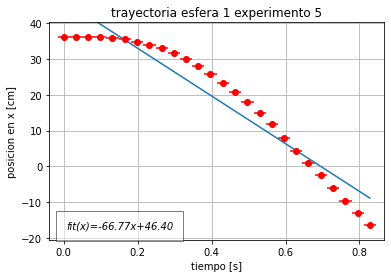

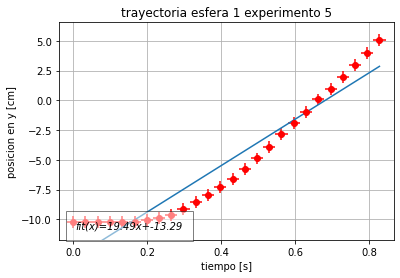

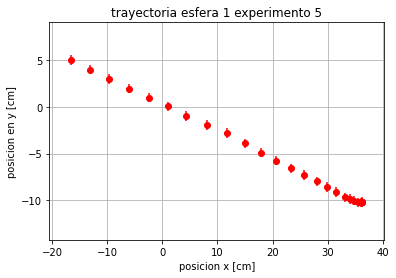

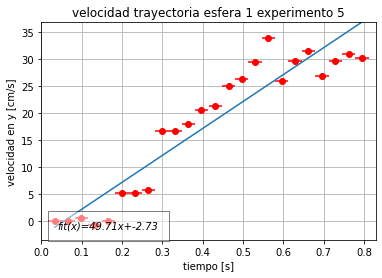

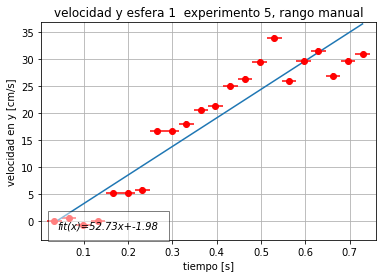

In [69]:
import csv

datt=[];
with open('./MRUA/ex6/ex6esfera1', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 1 experimento 5")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 1 experimento 5")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 1 experimento 5")
 
s1x5=xes
s1y5=yes



vs1x5=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs1x5, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 1 experimento 5")

vs1y5=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs1y5, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 1 experimento 5")

## begin manual fit
## zoom in for better fit

loindx=1 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-3 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs1x5[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x esfera 1  experimento 5, rango manual")
graficaDatos(tiempop[loindx:hindx], vs1y5[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y esfera 1  experimento 5, rango manual")

## end manual fit

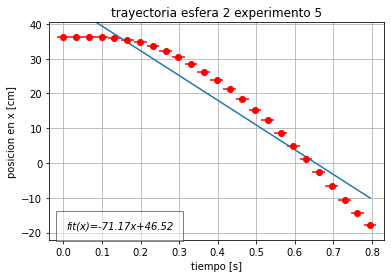

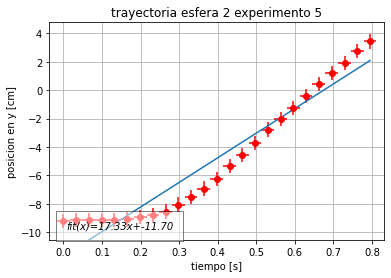

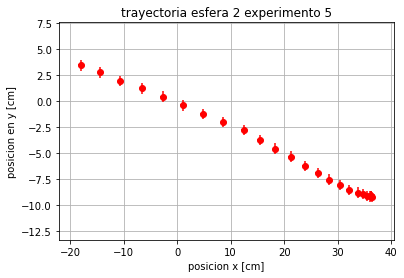

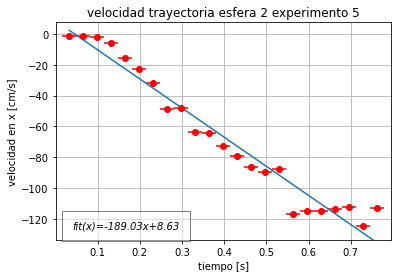

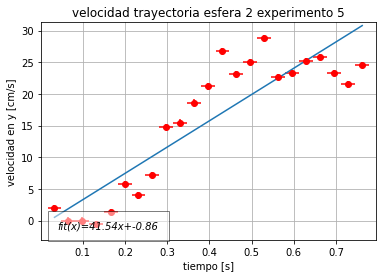

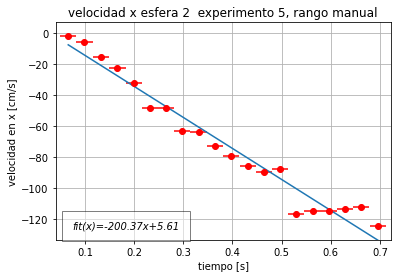

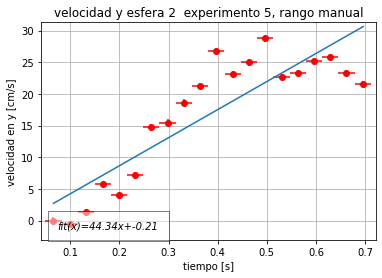

In [70]:
import csv

datt=[];
with open('./MRUA/ex6/ex6esfera2', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 2 experimento 5")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 2 experimento 5")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 2 experimento 5")
 
s2x5=xes
s2y5=yes

vs2x5=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs2x5, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 2 experimento 5")

vs2y5=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs2y5, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 2 experimento 5")


## begin manual fit
## zoom in for better fit

loindx=2 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-3 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs2x5[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x esfera 2  experimento 5, rango manual")
graficaDatos(tiempop[loindx:hindx], vs2y5[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y esfera 2  experimento 5, rango manual")

## end manual fit

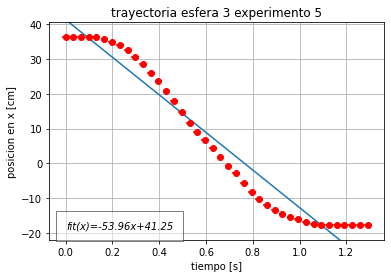

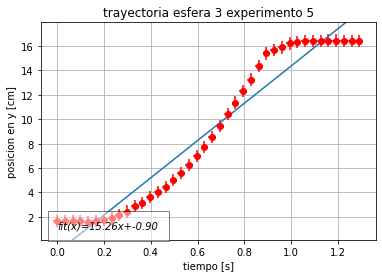

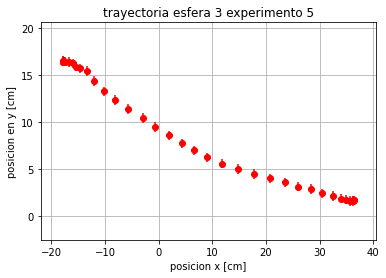

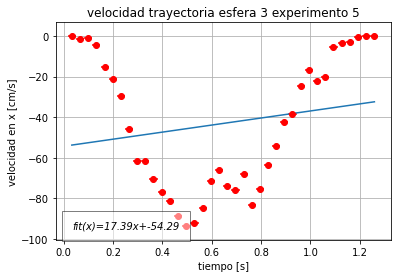

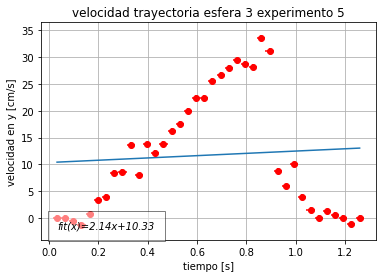

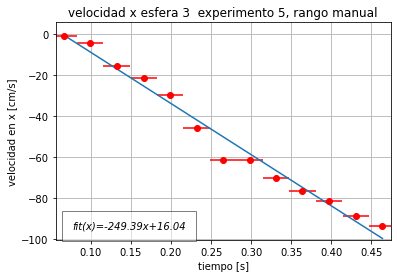

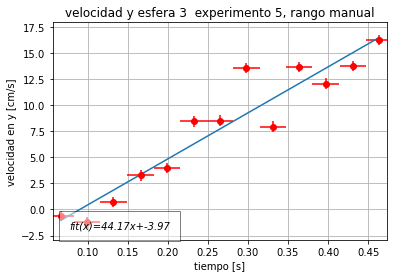

In [71]:
import csv

datt=[];
with open('./MRUA/ex6/ex6esfera3', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 3 experimento 5")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 3 experimento 5")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 3 experimento 5")
 
s3x5=xes
s3y5=yes

vs3x5=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs3x5, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 3 experimento 5")

vs3y5=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs3y5, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 3 experimento 5")

## begin manual fit
## zoom in for better fit

loindx=2 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-25 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs3x5[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x esfera 3  experimento 5, rango manual")
graficaDatos(tiempop[loindx:hindx], vs3y5[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y esfera 3  experimento 5, rango manual")

## end manual fit

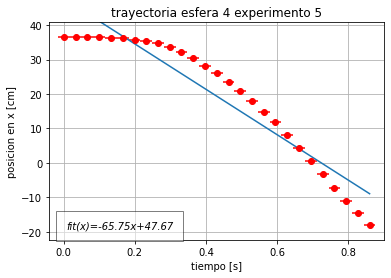

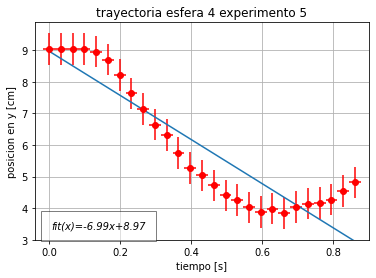

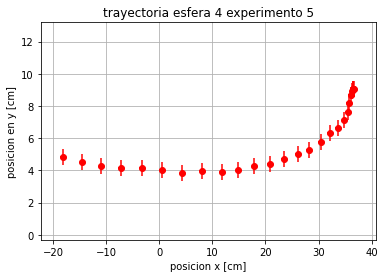

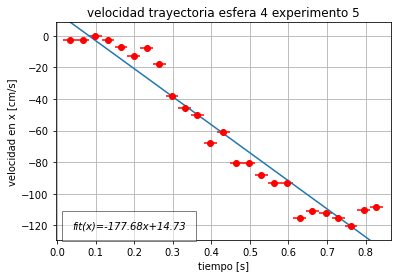

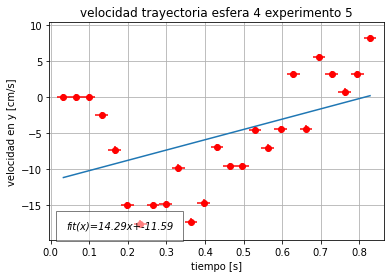

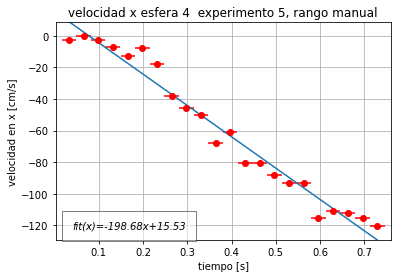

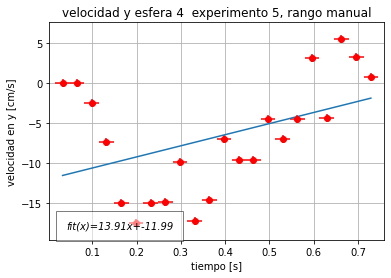

In [72]:
import csv

datt=[];
with open('./MRUA/ex6/ex6esfera4', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.5
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "trayectoria esfera 4 experimento 5")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "trayectoria esfera 4 experimento 5")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "trayectoria esfera 4 experimento 5")
 
s4x5=xes
s4y5=yes

vs4x5=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vs4x5, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 4 experimento 5")

vs4y5=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vs4y5, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 4 experimento 5")

## begin manual fit
## zoom in for better fit

loindx=1 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-4 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vs4x5[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x esfera 4  experimento 5, rango manual")
graficaDatos(tiempop[loindx:hindx], vs4y5[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y esfera 4  experimento 5, rango manual")

## end manual fit

# resultado experimento 5

In [75]:
#plt.plot(cx1,cy1,'b.',px1,py1,'r.',s1x1,s1y1,'g.',s2x1,s2y1,'c.',s3x1,s3y1,'m.',s4x1,s4y1,'y.')
plt.plot(px5,py5,'r.',cx5,cy5,'b.',s1x5,s1y5,'g.',s2x5,s2y5,'c.',s3x5,s3y5,'m.',s4x5,s4y5,'y.')


NameError: name 'cy5' is not defined

In [57]:
## uncertainty calculator suite

## to relative
## given a 2 vector (x,dx) representing a measurement and its uncertainty
## x+-dx |-> x(1+- dx/|x|)
## return the measurement as a vector (x,rdx) representing the measurement and relative uncertainty
def toRelative(x):
    if x[0] != 0:
        return([x[0],abs(x[1]/abs(x[0]))])
    else:
        return([x[0],abs(x[1]/abs(0.00000000001))])
## toRelative([-9,90.0])

## we want to be able to return from relative coordinates to our original representation
## undoToRel
def undoToRel(x):
    if x[0] != 0:
        res=[x[0], abs(x[0])*abs(x[1])]
    else:
        return([x[0],abs(x[1]*abs(0.00000000001))])
    return res

## now, we want to define the function sum, and multiplication for the vectors 
## note that these operations are defined on different bases
## we'll call them canonical base and relative base
## the canonical representation is (x,y) = x +- y
## the relative representation is (x,y) = x(1 +- y/|x|)
## (x,y) means a different thing in one base than in another

## ok

## sumUncert
## dis function takes a 2x2 vector in the canonical base [[x,dx],[y,dy]] 
## it returns the calculated sum with the apropriate uncertainty
def sumUncert(x):
    a=x[0][0]
    da=x[0][1]
    b=x[1][0]
    db=x[1][1]
    res = [a+b,abs(da)+abs(db)]
    return res

## multUncert
## dis one takes a 2x2 vector in the relative base [[x,dx],[y,dy]] 
## when two quantity are multiplied, their relative uncertainties add
## make sure to be in the correct base when using this
def multUncert(x):
    a=x[0][0]
    da=x[0][1]
    b=x[1][0]
    db=x[1][1]
    res = [a*b,abs(da)+abs(db)]
    return res

## we contend that sumUncert and multUncert can be used to define substraction and division

In [58]:
m1=[0.1450 , 0.00145] ## canonical base ie measurement1= -10 +- 1
m2 = [0.5181,0.0019] ## canonical base ie m2=10000 +- 10
## works fine even if sum is zero which would imply division by zero on toRelative by using an approximately small value
## of 0.00000000001 only when the measured value is zero


thing=multUncert([toRelative(m1),toRelative(m1)])
thing2=multUncert([thing,toRelative(m1)])
thing,thing2

res=sumUncert([sumUncert([m1,thing]),thing2])
res

[0.16907362499999998, 0.051449999999999996]

In [59]:

## given two measurements in the canonical base, we can multiply them like this
## first take them to the relative base
rm1=toRelative(m1)
rm2=toRelative(m2)
## then use multUncert
i1=multUncert([rm1,rm2])
## second iteration
i2=multUncert([i1,rm2])

## we can then return the measurement to canonical base or use in relative base, it depends on what we need
##[m1,m2,undoToRel(i1),undoToRel(i2)]
[toRelative(m1),toRelative(m2),i1,undoToRel(i2)]

[[0.145, 0.01],
 [0.5181, 0.003667245705462266],
 [0.0751245, 0.013667245705462266],
 [0.03892200345, 0.0006746931345]]

Cool so here you can see that although relative uncertainties add, the cumulative effect can be enormous, which explains what we saw in the data.

In [60]:
## we can also use multUncert to define the quotient of two measured quantities
m1=[100,1]
m2=[1000,100]


## first take them to the relative base
rm1=toRelative(m1)
rm2=toRelative(m2)

## then to find the multiplicative inverse of rm2 we do

irm2=[1/rm2[0],rm2[1]]


## then use multUncert
i1=multUncert([rm1,irm2])
## second iteration
i2=multUncert([i1,irm2])

In [61]:
i1, i2

([0.1, 0.11], [0.0001, 0.21000000000000002])

In [62]:
## youre given  the length of an object at some distance from the camera
## assuming that it's scaled only because of height difference (length in x or y coords is small)
## the way to undo that is by this function
## it eats some data vector
## in this example, only some data need to be corrected  thus (startind, endind)
## 

def makeSameSize()

SyntaxError: invalid syntax (<ipython-input-62-5f6e47298c8b>, line 8)

In [63]:
## janky arcsin function
np.abs?

In [65]:
import numpy as np
def magnitude(vec):
    vec=np.array(vec)
    mag = np.sqrt(vec.dot(vec))
    return mag

## takes a slope and the sine of the angle
## breaks if sint is bigger than one, but it shouldnt be
def gravv(m,sint):
    vec = np.array([m/sint, m/(np.cos(np.arcsin(sint)))])
    return magnitude(vec)


In [66]:
from numpy import *
arcsin(1)
magnitude([1,1])

1.4142135623730951

In [67]:
gravv(137.11,0.3886)
##magnitude([-223.64,4.45])

382.9261602457164

In [ ]:
gs = [-504.75,-507.78,-268.89,-571.53,-462.26,-423.25,-382.92,-394.54,-506.25,-438.72,-513.40,-413.89,-484.68,-354.09,-416.92,-430.04,-327.26,-468.53,-433.98,-449.52,-531.07,-459.42,-429.79,-452.48,-342.09,-421.41,-458.70,-467.98,-390.75,-317.84] 

In [ ]:
num=0
suma=0
for i in gs:
    num +=1
    suma += i
suma/num

In [ ]:
stdvec(gs)

# CAIDA LIBRE

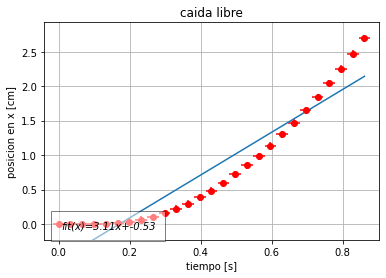

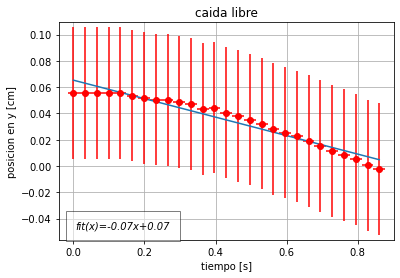

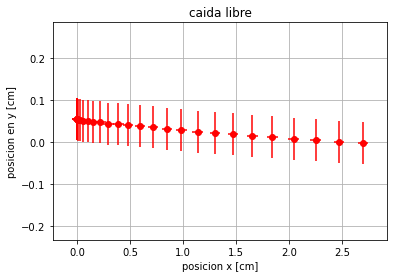

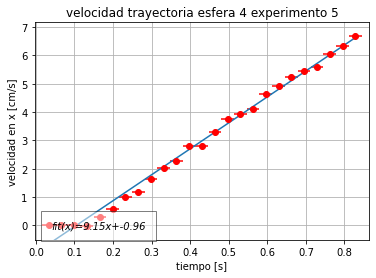

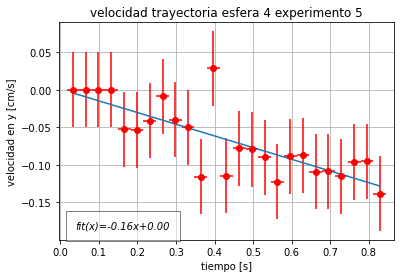

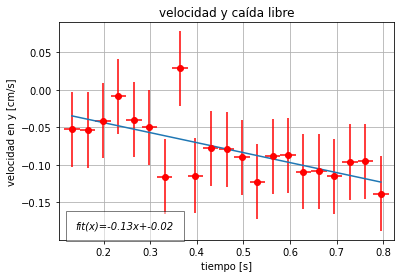

2.1964621530286155

In [112]:
import csv

datt=[];
with open('./CAIDALIBRE/caidalibre.txt', newline = '') as datos:                                                                                          
    filereader = csv.reader(datos, delimiter='\t')
    for dato in filereader:
        datt.append(dato)
datt.pop(0) # quitamos
datt.pop(0) # basura

tiempop=[]
xes=[]
yes=[]
for dato in datt:
    tiempop.append(float(dato[0]))
    xes.append(float(dato[1]))
    yes.append(float(dato[2]))

dt = (tiempop[1]-tiempop[2])*0.5
dx = 0.05
graficaDatos(tiempop, xes, dt, dx,"tiempo [s]", "posicion en x [cm]", "caida libre")
graficaDatos(tiempop, yes, dt, dx,"tiempo [s]", "posicion en y [cm]", "caida libre")
graficaEspacio(xes, yes, dx, dx,"posicion x [cm]", "posicion en y [cm]", "caida libre")
 
clx=xes
cly=yes

vclx=velocity(tiempop,xes)
graficaDatos(tiempop[1:len(tiempop)-1], vclx, dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad trayectoria esfera 4 experimento 5")

vcly=velocity(tiempop,yes)
graficaDatos(tiempop[1:len(tiempop)-1], vcly, dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad trayectoria esfera 4 experimento 5")

## begin manual fit
## zoom in for better fit

loindx=4 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-2 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], vclx[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en x [cm/s]", "velocidad x caída libre")
graficaDatos(tiempop[loindx:hindx], vcly[loindx:hindx], dt, dx,"tiempo [s]", "velocidad en y [cm/s]", "velocidad y caída libre")

## end manual fit

stdvec(vclx)

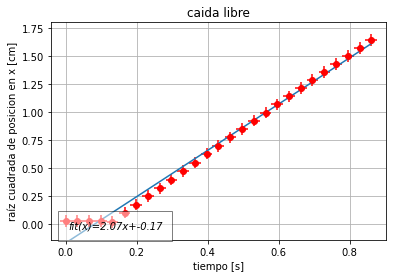

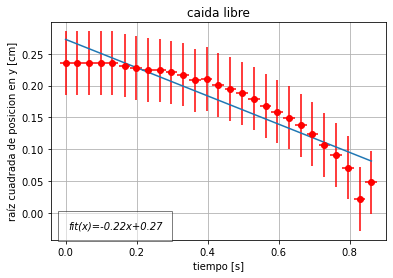

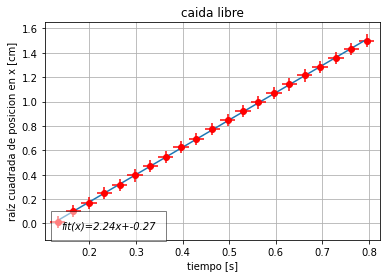

0.537559233502999

In [113]:
lclx=[]
lcly=[]

for dato in clx:
    lclx.append(np.sqrt(dato))
    
for dato in cly:
    lcly.append(np.sqrt(abs(dato)))
    
graficaDatos(tiempop, lclx, dt, dx,"tiempo [s]", "raíz cuadrada de posicion en x [cm]", "caida libre")
graficaDatos(tiempop, lcly, dt, dx,"tiempo [s]", "raíz cuadrada de posicion en y [cm]", "caida libre")
 

## begin manual fit
## zoom in for better fit

loindx=4 ## must be greater than 1 for speed and 2 for acceleration
hindx = len(xes)-2 ## must be smaller than len(xes)

graficaDatos(tiempop[loindx:hindx], lclx[loindx:hindx], dt, dx,"tiempo [s]", "raíz cuadrada de posicion en x [cm]", "caida libre")
graficaDatos(tiempop[loindx:hindx], lcly[loindx:hindx], dt, dx,"tiempo [s]", "raíz cuadrada de posicion en x [cm]", "caida libre")

## end manual fit

stdvec(lclx)

In [117]:

(9.6+10.01)/2

9.805

In [110]:
nxes = []
for i in yes:
    nxes.append(100*i)
    
nxes

[5.54,
 5.54,
 5.54,
 5.54,
 5.539000000000001,
 5.36,
 5.183,
 5.045999999999999,
 5.018000000000001,
 4.886,
 4.72,
 4.338,
 4.4319999999999995,
 4.054,
 3.789,
 3.527,
 3.231,
 2.827,
 2.535,
 2.246,
 1.886,
 1.528,
 1.137,
 0.8194999999999999,
 0.5043,
 0.04679,
 -0.2281]